# Table of Contents
* [1. Case Description](#chapter1)
    * [1.1 Motivation and brief introduction to the topic at hand](#section_1_1)
    * [1.2 What are interesting questions you are going to tackle?](#section_1_2) 
    * [1.3 Dataset description](#section_1_3) 
    * [1.4 Research questions tackled](#section_1_4) 
* [2. Related Work](#chapter2)
* [3. Project Execution](#chapter3)
    * [3.1 Load Data ](#section_3_1)
    * [3.2 Prepare and investigate the data](#section_3_2)
        * [3.2.1 Initial exploration](#sub_section_3_2_1)
        * [3.2.2 Data pre-processing](#sub_section_3_2_2)
            * [3.2.2.1 Data wrangling](#sub_sub_section_3_2_2_1)
            * [3.2.2.2 Feature engineering](#sub_sub_section_3_2_2_2)
        * [3.2.3 Visual Exploration](#sub_section_3_2_3)
    * [3.3 Clustering](#section_3_3)
        * [3.3.1 K-means clustering](#sub_section_3_3_1)
        * [3.3.2 DBSCAN](#sub_section_3_3_2)
    * [3.4 Regression Modeling](#section_3_4)
        * [3.4.1 Statsmodel](#sub_section_3_4_1)
        * [3.4.2 SK-Learn](#sub_section_3_4_2)   
            * [3.4.2 Linear regression](#sub_section_3_4_2_1)
            * [3.4.2 LASSO variable selection](#sub_section_3_4_2_2)
            * [3.4.2 K-means Regression](#sub_section_3_4_2_3)  
            * [3.4.2 Random Forrest](#sub_section_3_4_2_4)  
    * [3.5 Classification](#section_3_5)
        * [3.5.1 Task Description](#sub_section_3_5_1)
        * [3.5.2 Feature Pre-Processing](#sub_section_3_5_2)
        * [3.5.3 Logistic Regression](#sub_section_3_5_3)
        * [3.5.4 Random Forest](#sub_section_3_5_4)
        * [3.5.5 K-nearest neighbour](#sub_section_3_5_5)
        * [3.5.6 Conclusion](#sub_section_3_5_6)

To figure out the table of contents at the end: https://www.geeksforgeeks.org/how-to-add-a-table-of-contents-in-the-jupyter-notebook/

# 1. Case Description <a id="chapter1"></a>

## 1.1. Motivation and brief introduction to the topic at hand <a id="section_1_1"></a>

The original motivation for choosing *a* housing market dataset for the analysis was our interest in visualizing our findings in geodemographic manner.

We chose the Singapore housing market for its uniqness within the real estate industry. Unlike in most other countries, the Singapore market is significantly influenced by a strong public housing policy, where approximately 80% of the population resides in houses developed by the state. Singapore's largest developer, a statutory body of the Ministry of National Development called the Housing and Development Board (HDB) [owns and manages most of the Singapore citizens' homes](https://unassumingeconomist.com/2018/04/understanding-singapores-housing-market/). HDB, following a land-lease system, owns the land and leases it out to the unit owner for a [maximum period of 99 years](https://www.marketurbanist.com/blog/the-pros-cons-of-singapores-housing-model#:~:text=In%20Singapore%2C%20nearly%2080%25%20of,years%20to%20these%20unit%20owners.). Throughout the time of the lease, the estate's land and common areas continue to be owned by the government.

Under certain conditions, the occupied public housing can be sold in a resale market. However, although without direct government price regulation, in the past 30 years, HDB has been introducing additional taxes and restrictions on such resales to discourage investment in housing as it was driving prices up [(Groves, Murie, & Watson, 2007)](https://search.worldcat.org/title/1291944332]). Hence, the Singapore housing system remains to be tightly regulated by the government. Intertwined with the globalised nature of the city, being an international business hub, as well as its geographical struggles with limited land area, the city-state institutes an interesting case of otherwise rather predictive housing markets dynamics.  
 
Given this exceptionally high governmental involvement, understanding the factors that influence resale prices is especially interesting for policymakers speculating how would the market react upon implementation of similar policies and what would the implications to potential buyers be. 
Therefore, we aim to analyze available Singapore HDB resaling prices in combination with geodemographic data, and provide insights into data-driven housing prices prediciton. 

## 1.2 What are interesting questions you are going to tackle? <a id="section_1_2"></a>

Some interesting questions we would like to tackle are:
- Which kind of variables influence the resale price of a flat in Singapore?
- Are only flat-specific, or also location-specific variables having an influence on the flat price?
- Does the 99-year lease program have any impact on the price of flats?
- Which regions in Sinagpore are more acclaimed and in higher demand for flats?
- How do the regions differ from one another?

## 1.3 Dataset description <a id="section_1_3"></a>

### Overview:
The dataset we are working with is called Singapore HDB Flat Resale Prices (1990-2020), which can be accessed from the [Kaggle platform](https://www.kaggle.com/datasets/teyang/singapore-hdb-flat-resale-prices-19902020/data). The owner of the dataset is Teyang Lau, who uploaded the dataset on January 17, 2021. As mentioned in the title, it spans the years 1990 to 2020, and contains roughly 800,000 rows.

### Features:

**Month**:
- Represents the month and year when the transaction occurred.

**Town**:
- Indicates the town in which the flat is located. This spatial data allows for geographic analysis of housing trends.

**Flat Type**:
- Specifies the type of flat (e.g., 3-room, 4-room). This categorization helps in understanding the distribution and preferences for different flat sizes.

**Block**:
- Denotes the block number where the flat is situated.

**Street Name**:
- Provides the street name of the flat, further aiding in precise geographic localization.

**Storey Range**:
- Indicates the floor level range of the flat (e.g., 04 TO 06). This helps in analyzing the influence of floor height on resale prices.

**Floor Area (sqm)**:
- Lists the floor area in square meters, including any additional space from purchased recess areas or upgrades.

**Flat Model**:
- Describes the model of the flat, which can include various designs and layouts.

**Lease Commencement Date**:
- Shows the date when the lease started. This is crucial for understanding the remaining lease duration, which impacts the resale price and eligibility for financing.

**Remaining Lease**:
- Provides the remaining lease of the flat in years. This is a critical factor as the value of HDB flats typically decreases as the lease period shortens, affecting the resale price and potential buyer’s financing options.

**Resale Price**:
- Provides the nominal resale price of the flat, serving as the primary variable of interest for economic and financial analysis.

**Notes**:
- The dataset excludes transactions that might not reflect the full market price, such as sales between relatives or part-share sales.
- Resale prices are indicative and can vary based on multiple factors.
- The remaining lease is provided in years and months, calculated at the point of resale application and rounded to the nearest month for financial processing.
- Data collection methodologies changed in March 2012, shifting from date of approval to date of registration. This is important as later in the notebook, we only work on a subset from 2015-2020.

### Additional features we gathered:

We have also extracted additional features of interest, based on the street address variable in the main dataset, using an open-source map API.

**Nearest School Distance**:
- This variable indicates the distance from the flat to the nearest school. The proximity to educational institutions is a crucial factor for families with children, as it influences their daily commute and overall convenience.

**Nearest Hospital Distance**:
- This variable measures the distance from the flat to the nearest hospital. Access to healthcare facilities is a vital consideration for many buyers, and shorter distances to hospitals can positively impact the resale value of flats.

**Nearest Park Distance**:
- This variable denotes the distance from the flat to the nearest park. Parks and green spaces contribute to the livability and appeal of a neighborhood by offering recreational opportunities and environmental benefits.

# 1.4 Research questions tackled <a id="section_1_4"></a>

We have tackled the following concrete research questions:

**Clustering**:
- How do variations in key features like floor area and resale price segment the housing market in Singapore?
- What patterns and groupings can we identify among flats in Singapore based on proximity to key amenities?

**Regression**:
- What is the best model used to predict the resale prices in Singapore?
- What variables are the best predictors of the resale price?
- Can we see any differences and similarities between traditional housing market predictors?

**Classification**:
- Do the flats in Singapore's regions differ between one another?
- Which regions are more acclaimed and of higher interest to potential buyers?

# 2. Related Work <a id="chapter2"></a>

One work we identified to be appropriate for comparison is the dataset author's [starter notebook](https://www.kaggle.com/code/teyang/drivers-of-hdb-resale-price-and-prediction) on the Kaggle platform. Since the author is citizen of Singapore, they may have better local experience than us of e.g., the towns being mapped appropriately to regions, and the flat models being appropriately cleaned. 

However, our works highly differ as we have also conducted clustering and classification tasks, which the author did not do. In addition, we have also extracted additional features to include in our exercises.

# 3. Project Execution <a id="chapter3"></a>

## 3.1 Load Data <a id="section_3_1"></a>

Importing the required datasets for conducting the project analysis.

In [1]:
# For operating system settings
import os

# For data pre-processing
import pandas as pd
import re
from datetime import datetime, timedelta
import numpy as np

# For data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the working directory
#os.chdir("/home/jovyan/my-notebooks/B_Exam")

Loading the datasets we will be working with.

In [2]:
flats_1990_1999 = pd.read_csv("resale-flat-prices-based-on-approval-date-1990-1999.csv")
flats_2000_2012 = pd.read_csv("resale-flat-prices-based-on-approval-date-2000-feb-2012.csv")
flats_2012_2014 = pd.read_csv("resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv")
flats_2015_2016 = pd.read_csv("resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv")
flats_2017_2020 = pd.read_csv("resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv")

Let's briefly investigate the datasets individually before merging them into one. We will do a more thorough exploration on the main dataset in the exploration section.

In [3]:
print("-- Dataset name: \n", "flats_1990_1999")
print("-- Shape of the dataset: \n", flats_1990_1999.shape)
print("-- Columns of the dataset: \n", flats_1990_1999.columns)

-- Dataset name: 
 flats_1990_1999
-- Shape of the dataset: 
 (287200, 10)
-- Columns of the dataset: 
 Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')


In [4]:
print("-- Dataset name: \n", "flats_2000_2012")
print("-- Shape of the dataset: \n", flats_2000_2012.shape)
print("-- Columns of the dataset: \n", flats_2000_2012.columns)

-- Dataset name: 
 flats_2000_2012
-- Shape of the dataset: 
 (369651, 10)
-- Columns of the dataset: 
 Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')


In [5]:
print("-- Dataset name: \n", "flats_2012_2014")
print("-- Shape of the dataset: \n", flats_2012_2014.shape)
print("-- Columns of the dataset: \n", flats_2012_2014.columns)

-- Dataset name: 
 flats_2012_2014
-- Shape of the dataset: 
 (52203, 10)
-- Columns of the dataset: 
 Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')


In [6]:
print("-- Dataset name: \n", "flats_2015_2016")
print("-- Shape of the dataset: \n", flats_2015_2016.shape)
print("-- Columns of the dataset: \n", flats_2015_2016.columns)

-- Dataset name: 
 flats_2015_2016
-- Shape of the dataset: 
 (37153, 11)
-- Columns of the dataset: 
 Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')


In [7]:
print("-- Dataset name: \n", "flats_2017_2020")
print("-- Shape of the dataset: \n", flats_2017_2020.shape)
print("-- Columns of the dataset: \n", flats_2017_2020.columns)

-- Dataset name: 
 flats_2017_2020
-- Shape of the dataset: 
 (80374, 11)
-- Columns of the dataset: 
 Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')


We may observe that starting 2015, a new variable has been recorded, called  `remaining_lease`. Therefore, when merging the datasets, we will assign null values to all the apartments, years 1990-2014, without a record for this column, and keep the present values for years 2015-2020.

In [8]:
# Merging the datasets together
flats_df = pd.concat([flats_1990_1999, flats_2000_2012, flats_2012_2014, 
                      flats_2015_2016, flats_2017_2020], axis=0, ignore_index=True, sort=False)

## 3.2 Prepare and investigate the data <a id="section_3_2"></a>

### 3.2.1 Initial exploration <a id="sub_section_3_2_1"></a>

In [9]:
# Observing the head of the dataframe
flats_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [10]:
# Observing the tail of the dataframe
flats_df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
826576,2020-09,YISHUN,5 ROOM,716,YISHUN ST 71,07 TO 09,131.0,Improved,1987,440000.0,66 years 03 months
826577,2020-09,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,458000.0,65 years 06 months
826578,2020-09,YISHUN,5 ROOM,835,YISHUN ST 81,04 TO 06,122.0,Improved,1987,490000.0,66 years 04 months
826579,2020-09,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Maisonette,1987,558000.0,66 years 03 months
826580,2020-09,YISHUN,EXECUTIVE,387,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,555000.0,66 years 09 months


In [11]:
# Observing the shape of the dataframe
flats_df.shape

(826581, 11)

In [12]:
# Information about the columns
flats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826581 entries, 0 to 826580
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                826581 non-null  object 
 1   town                 826581 non-null  object 
 2   flat_type            826581 non-null  object 
 3   block                826581 non-null  object 
 4   street_name          826581 non-null  object 
 5   storey_range         826581 non-null  object 
 6   floor_area_sqm       826581 non-null  float64
 7   flat_model           826581 non-null  object 
 8   lease_commence_date  826581 non-null  int64  
 9   resale_price         826581 non-null  float64
 10  remaining_lease      117527 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 69.4+ MB


In [13]:
# Column statistics
flats_df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,826581.000000,826581.000000,8.265810e+05
mean,95.557909,1987.149345,2.935490e+05
std,26.057093,9.451743,1.487536e+05
min,28.000000,1966.000000,5.000000e+03
25%,73.000000,1980.000000,1.810000e+05
50%,93.000000,1986.000000,2.750000e+05
75%,114.000000,1994.000000,3.830000e+05
max,307.000000,2019.000000,1.258000e+06


In [14]:
# Unique values per each column
for col in flats_df:
    print(f"{col}: {flats_df[col].nunique()}")

month: 369
town: 27
flat_type: 8
block: 2454
street_name: 568
storey_range: 25
floor_area_sqm: 209
flat_model: 33
lease_commence_date: 54
resale_price: 8481
remaining_lease: 673


In [15]:
# Missing values per column
flats_df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709054
dtype: int64

In [16]:
# View number of duplicated rows (exactly same values for all columns)
flats_df[flats_df.duplicated()]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
673,1990-01,GEYLANG,3 ROOM,47,CIRCUIT RD,01 TO 03,56.0,STANDARD,1969,18000.0,NaN
726,1990-01,HOUGANG,3 ROOM,308,HOUGANG AVE 5,10 TO 12,67.0,NEW GENERATION,1983,47000.0,NaN
843,1990-01,JURONG WEST,3 ROOM,145,HU CHING RD,04 TO 06,64.0,IMPROVED,1976,23400.0,NaN
854,1990-01,JURONG WEST,3 ROOM,172,BOON LAY DR,10 TO 12,70.0,IMPROVED,1974,32900.0,NaN
862,1990-01,JURONG WEST,3 ROOM,185,BOON LAY AVE,22 TO 24,59.0,IMPROVED,1975,22500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
820938,2020-07,SENGKANG,4 ROOM,178A,RIVERVALE CRES,07 TO 09,93.0,Model A,2015,375000.0,93 years 08 months
822005,2020-08,BUKIT MERAH,2 ROOM,45,TELOK BLANGAH DR,04 TO 06,45.0,Improved,1976,210000.0,54 years 05 months
822440,2020-08,HOUGANG,3 ROOM,115,HOUGANG AVE 1,01 TO 03,67.0,New Generation,1981,260000.0,60 years 02 months
822699,2020-08,JURONG WEST,5 ROOM,183D,BOON LAY AVE,04 TO 06,112.0,Improved,2015,490000.0,93 years 05 months


Let's have a more granular look into each column.

#### Column: `month`

In [17]:
# Observing the type of the column
flats_df["month"].dtypes

dtype('O')

We may observe that the `month` column is of pandas type `object`, i.e., string, rather than a date type. We will convert it into a `datetime` type in the pre-processing section of the notebook.

In [18]:
# Observing the count of unique values of the column
flats_df["month"].value_counts()

month
1999-03    6468
1999-06    5862
1998-10    5709
1999-04    5698
1999-05    5671
           ... 
1991-02     816
1990-10     810
1990-05     778
2020-04     424
2020-05     363
Name: count, Length: 369, dtype: int64

#### Column: `town`

In [19]:
# Observing the count of unique values of the column
flats_df["town"].value_counts()

town
TAMPINES           73101
YISHUN             63309
BEDOK              61400
JURONG WEST        60708
WOODLANDS          58735
ANG MO KIO         48237
HOUGANG            45476
BUKIT BATOK        40444
CHOA CHU KANG      33388
BUKIT MERAH        30518
PASIR RIS          30267
TOA PAYOH          28525
QUEENSTOWN         25922
CLEMENTI           25755
GEYLANG            25679
BUKIT PANJANG      24241
KALLANG/WHAMPOA    24030
SENGKANG           23903
JURONG EAST        22864
SERANGOON          21125
BISHAN             19522
PUNGGOL            12336
SEMBAWANG          11016
MARINE PARADE       7388
CENTRAL AREA        6345
BUKIT TIMAH         2283
LIM CHU KANG          64
Name: count, dtype: int64

Surprisingly, the `LIM CHU KANG` town has only 64 values (or flats listed) over the course of 30 years. According to the [Wikipedia page](https://en.wikipedia.org/wiki/Lim_Chu_Kang) of the town, this may be due to its rural and underdeveloped nature, and due its land use primarily consisting of military training areas, agriculture, farms, cemeteries, and a cinerarium.

#### Column: `flat_type`

In [20]:
# Observing the count of unique values of the column
flats_df["flat_type"].value_counts()

flat_type
4 ROOM              309314
3 ROOM              272580
5 ROOM              170408
EXECUTIVE            62641
2 ROOM                9863
1 ROOM                1273
MULTI GENERATION       279
MULTI-GENERATION       223
Name: count, dtype: int64

We may observe that there are two categories of flats that hint towards the same class: multi-generation, or 3Gen, according to Singapore's Housing Development Board (HBD) [website](https://www.hdb.gov.sg/residential/buying-a-flat/finding-a-flat/types-of-flats) (see [also](https://blog.carousell.com/property/hdb-flat-types-singapore/)). We will likewise make sure to adapt the categories accordingly in the pre-processing section.

#### Column: `block`

In [21]:
# Observing the count of unique values of the column
flats_df["block"].value_counts()

block
2       4309
1       3776
110     3181
101     3154
4       3094
        ... 
530C       1
530B       1
473A       1
294A       1
164A       1
Name: count, Length: 2454, dtype: int64

An interesting observation is that, according to the [Quora community](https://www.quora.com/Why-did-Singapore-start-having-HDB-block-numbers-with-letters-e-g-172A-B-C), around more than 7 years ago Singapore started to include letters along with the block number of a flat (e.g., block 60, 60A, 60B). This made us consider that the block number could prove as a useful feature in the regression/classification tasks, therefore we might have to strip the block letter from each individual string (i.e., in order to have a more balanced dataset). That is because our assumption is that the block value of a flat could influence the result (i.e., the higher the number, the more on "top" of a street it is, hence likely a better location, or otherwise).

In [22]:
# Brief preview of some columns that contain different flats with different block values but in the same town and with similar `floor_area_sqm`
flats_df[flats_df["block"].str.startswith("430", na=True)].tail(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
823981,2020-08,YISHUN,4 ROOM,430B,YISHUN AVE 11,07 TO 09,92.0,Model A,2015,400000.0,94 years 04 months
823985,2020-08,YISHUN,4 ROOM,430B,YISHUN AVE 11,04 TO 06,92.0,Model A,2015,385000.0,94 years 04 months
825730,2020-09,SENGKANG,3 ROOM,430C,FERNVALE LINK,10 TO 12,67.0,Model A,2015,350000.0,93 years 08 months
826458,2020-09,YISHUN,4 ROOM,430A,YISHUN AVE 11,10 TO 12,92.0,Model A,2015,420000.0,94 years 05 months
826472,2020-09,YISHUN,4 ROOM,430A,YISHUN AVE 11,04 TO 06,92.0,Model A,2015,395000.0,94 years 03 months


#### Column: `street_name`

In [23]:
# Observing the count of unique values of the column
flats_df["street_name"].value_counts()

street_name
YISHUN RING RD        16210
BEDOK RESERVOIR RD    13734
ANG MO KIO AVE 10     12932
ANG MO KIO AVE 3      11381
HOUGANG AVE 8          8638
                      ...  
HOUGANG ST 32            10
OUTRAM HILL               9
MARINE PARADE CTRL        2
TAMPINES ST 86            2
SUMANG WALK               2
Name: count, Length: 568, dtype: int64

Due to its concentrated and geographic position, there are only 568 addresses (including their respective numbers) in the dataset. Just like our assumption above, we could theorize that a given street may have a much higher preference due to its proximity to e.g., the [planning area](https://en.wikipedia.org/wiki/Planning_areas_of_Singapore) centre. That is why we could also strip the street addresses of the numbers and only keep the names for our regression/classification tasks.

#### Column: `storey_range`

In [24]:
# Observing the count of unique values of the column
flats_df["storey_range"].value_counts()

storey_range
04 TO 06    209705
07 TO 09    189109
01 TO 03    168985
10 TO 12    160250
13 TO 15     52212
16 TO 18     19449
19 TO 21      9422
22 TO 24      6053
01 TO 05      2700
25 TO 27      2544
06 TO 10      2474
11 TO 15      1259
28 TO 30      1049
34 TO 36       267
31 TO 33       265
16 TO 20       265
37 TO 39       255
40 TO 42       132
21 TO 25        92
26 TO 30        39
46 TO 48        21
43 TO 45        16
49 TO 51         9
36 TO 40         7
31 TO 35         2
Name: count, dtype: int64

The `storey_range` column refers to the building levels of the flat. We may deduce the following:
- According to a Singaporean house analyst's [website](https://www.teoalida.com/singapore/map-of-hdb-blocks-by-height/), as of December 2023, Singapore has no building that goes over 50 floors (or storeys). 
- Next, the values above do not mean that a specific flat occupies two floors (i.e., 04 TO 06), but we believe that the author (HBD) of the dataset has already categorized the flats into classes of range 2 to 4.
- Some ranges appear to overlap or be subsets of larger ranges, such as "01 TO 05" and "06 TO 10". This could indicate that the data collection criteria or categorization methods have changed over time or that there are different schemes for different buildings.

One option we could do with this column is to group the flats that have storey level 30 or higher into one category, in order to account for some of the imbalance.

#### Column: `floor_area_sqm`

In [25]:
# Observing the min, max, std, mean, and quartiles of a column
flats_df["floor_area_sqm"].describe()

count    826581.000000
mean         95.557909
std          26.057093
min          28.000000
25%          73.000000
50%          93.000000
75%         114.000000
max         307.000000
Name: floor_area_sqm, dtype: float64

In [26]:
# Calculate the median of the column
flats_df["floor_area_sqm"].median()

93.0

The smallest listed flat in terms of square meters contains 28m$^2$, whereas the largest one 307m$^2$. The median square meters of the dataset is 93m$^2$.

#### Column: `flat_model`

In [27]:
# Observing the count of unique values of the column
flats_df["flat_model"].value_counts()

flat_model
Model A                   158008
Improved                  143763
New Generation             98672
NEW GENERATION             78898
IMPROVED                   73593
MODEL A                    70381
Premium Apartment          35029
Simplified                 30702
SIMPLIFIED                 23258
Standard                   22479
Apartment                  22103
STANDARD                   17375
Maisonette                 14694
MAISONETTE                 12215
APARTMENT                   9901
Model A2                    9109
DBSS                        1609
Adjoined flat               1085
MODEL A-MAISONETTE           982
Model A-Maisonette           907
Terrace                      395
MULTI GENERATION             279
Type S1                      272
TERRACE                      247
Multi Generation             223
Type S2                      129
Premium Maisonette            82
Improved-Maisonette           70
IMPROVED-MAISONETTE           44
Premium Apartment Loft        31

We may observe that there are recurring categories which should be standardized in the pre-processing section, which we intend to do following the official HBD websites, as well as this [page](https://www.teoalida.com/singapore/hdbflattypes/).

#### Column: `lease_commence_date`

In [28]:
# Observing the count of unique values of the column
flats_df["lease_commence_date"].value_counts()

lease_commence_date
1985    82072
1984    59376
1988    47297
1987    40007
1978    38703
1986    36122
1980    30079
1989    29975
1979    28973
1997    28272
1993    26145
1996    25857
1998    23178
1983    21679
1976    20039
1981    19506
1977    19469
1992    18612
1999    18352
1995    17505
2001    16690
1975    16182
2000    16023
1974    13615
2003    13163
1982    12457
1970    10646
2002    10617
1990     8651
1973     8049
1969     7885
1971     7461
2004     7038
1994     6018
1967     5761
1972     5421
2015     4806
2013     3424
2012     3270
2005     3250
2006     2519
2014     1814
1968     1776
2011     1773
2008     1612
2009     1321
2016     1177
1991     1153
2010     1015
2007      738
1966       28
2017        7
2018        2
2019        1
Name: count, dtype: int64

It appears that the lease commencement date of the flats date back as far as 1971. This should not be confused with the range of our dataset, which is from 1990 to 2020. While our dataset records transactions (or apartment listings), the `lease_commence_date` represents the year when the lease agreement for the flat began. We may observe that very few flats have began their leasing from the years 2017-2020.

#### Column: `resale_price`

In [29]:
# Displaying the values below in non-scientific format
pd.set_option('display.float_format', '{:.2f}'.format)

# Observing the min, max, std, mean, and quartiles of a column
flats_df["resale_price"].describe()

count    826581.00
mean     293548.99
std      148753.60
min        5000.00
25%      181000.00
50%      275000.00
75%      383000.00
max     1258000.00
Name: resale_price, dtype: float64

In [30]:
# Calculate the median of the column
flats_df["resale_price"].median()

275000.0

We may observe that the lowest (un-adjusted for inflation) resale price of a flat went for S\\$5000, whereas the highest for S\\$1,258,000. The median value of the resale price amounts to S\\$275,000. These findings demonstrate that when tending to the `resale_price` column in the pre-processing steps, we should account for the yearly inflation values.

#### Column: `remaining_lease`

In [31]:
# Observing the count of unique values of the column
flats_df["remaining_lease"].value_counts()

remaining_lease
68                    2328
67                    1857
69                    1635
71                    1547
84                    1423
                      ... 
48                       1
97 years 01 month        1
97 years 09 months       1
45 years 04 months       1
97 years                 1
Name: count, Length: 673, dtype: int64

This variable is really interesting for a couple of reasons:

- First, in Singapore, when one purchases a flat from the HDB, they are essentially buying a [long-term leasehold property (99 years)](https://www.hdb.gov.sg/about-us/news-and-publications/publications/hdbspeaks/an-hdb-flat-for-your-different-life-cycle-needs). Accordingly, the value of an HDB flat is influenced by the remaining lease duration, where flats with more years left on their lease generally involve higher prices.
- Second, the column records the remaining lease (in either only years or years and months) left starting from the year it was leased (i.e., the `lease_commence_date` column). What we could do in the pre-processing section is to convert the `remaining_lease` column to seconds since the `lease_commence_date`. As such, we could truly account for this variable and include it in our regression/classification tasks.

Another [fun fact](https://www.99.co/singapore/insider/leasehold-property-99-years/), at the end of the 99-year lease, the property reverts back to the state. The government may decide to redevelop the area, in which case residents might be offered compensation or relocation options.

### 3.2.2 Data pre-processing <a id="sub_section_3_2_2"></a>

#### 3.2.2.1 Data wrangling <a id="sub_sub_section_3_2_2_1"></a>

Having analysed the dataset above from years 1990-2020, we have decided that we will be working with a subset of years 2015-2020. The reasons are the following:
- Starting 2012, according to the dataset author, "the data is based on date of registration for the resale transactions", and not "on date of approval for the resale transactions".
- Since 2015, a new variable has been recorded, which is the `remaining_lease`. As we will see below, it is a really significant variable and its absence from years 1990-2015 would lead to worse performing ML models.
- The period 1990-2020 includes ~800,000 rows, whereas 2015-2020 around ~100,000 only. Therefore, due to limited computing resources on our JupyterHub server, we will be working on the smaller subset.

In [32]:
# Merging the 2015-2020 datasets together
flats_df = pd.concat([flats_2015_2016, 
                      #flats_1990_1999, flats_2000_2012, flats_2012_2014, 
                      flats_2017_2020], axis=0, ignore_index=True, sort=False)

In [33]:
flats_df # 117k rows between 2015 and 2020

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.00,Improved,1986,70,255000.00
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.00,New Generation,1981,65,275000.00
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.00,New Generation,1980,64,285000.00
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.00,New Generation,1979,63,290000.00
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.00,New Generation,1980,64,290000.00
...,...,...,...,...,...,...,...,...,...,...,...
117522,2020-09,YISHUN,5 ROOM,716,YISHUN ST 71,07 TO 09,131.00,Improved,1987,66 years 03 months,440000.00
117523,2020-09,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.00,Improved,1987,65 years 06 months,458000.00
117524,2020-09,YISHUN,5 ROOM,835,YISHUN ST 81,04 TO 06,122.00,Improved,1987,66 years 04 months,490000.00
117525,2020-09,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.00,Maisonette,1987,66 years 03 months,558000.00


In [34]:
# Removing duplicated rows as identified above
print("Removing", flats_df.shape[0] - flats_df.drop_duplicates().shape[0], "duplicated rows.")
flats_df.drop_duplicates(inplace=True)

Removing 234 duplicated rows.


#### Column: `month`

In [35]:
# Renaming the month column and changing the data type, split into year/month/day
flats_df=flats_df.rename(columns={"month" : "resale_date"})
flats_df['resale_date'] = pd.to_datetime(flats_df['resale_date'])

flats_df['year'] = flats_df['resale_date'].dt.strftime('%Y')
flats_df['month'] = flats_df['resale_date'].dt.strftime('%m')
flats_df['day'] = flats_df['resale_date'].dt.strftime('%d')

flats_df["resale_date"].dtype

dtype('<M8[ns]')

#### Column: `flat_type`

In [36]:
# Replacing the differently spelled flat types with a common category spelling
flats_df["flat_type"] = flats_df["flat_type"].replace(["MULTI GENERATION", "MULTI-GENERATION"], "MULTIGENERATION")

In [37]:
flats_df.flat_type.value_counts()

range_mapping = {
    '1 ROOM': 1, '2 ROOM': 2, '3 ROOM': 3,  '4 ROOM': 4,  '5 ROOM': 5,
     'EXECUTIVE': 6, 'MULTIGENERATION': 6}

# We create a new `int` column called `n_rooms` out of the `flat_type` one to use
# as an integer in the models, rather than category
flats_df['n_rooms'] = flats_df['flat_type'].map(range_mapping)

#### Column: `storey_range`

In [38]:
# Since there are some overlaps in the data due to different recording rules
# over the years, we simply create new categories that encompass more storeys,
# and as a result achieve less dummy categories for our ML models
range_mapping = {
    '01 TO 03': '01 TO 10', '04 TO 06': '01 TO 10', '07 TO 09': '01 TO 10',
    '10 TO 12': '11 TO 20', '13 TO 15': '11 TO 20', '16 TO 18': '11 TO 20', '19 TO 21': '11 TO 20',
    '22 TO 24': '21 TO 30', '25 TO 27': '21 TO 30', '28 TO 30': '21 TO 30',
    '31 TO 33': '31 TO 40', '34 TO 36': '31 TO 40', '37 TO 39': '31 TO 40', '40 TO 42': '41 TO 51',
    '43 TO 45': '41 TO 51', '46 TO 48': '41 TO 51', '49 TO 51': '41 TO 51',
    '01 TO 05': '01 TO 10', '06 TO 10': '01 TO 10',
    '11 TO 15': '11 TO 20', '16 TO 20': '11 TO 20',
    '21 TO 25': '21 TO 30', '26 TO 30': '21 TO 30',
    '31 TO 35': '31 TO 40', '36 TO 40': '31 TO 40'
}

flats_df['storey_range'] = flats_df['storey_range'].map(range_mapping)

#### Column: `flat_model`

In [39]:
# Creating a dictionary with the values we want to replace and how they should look like
model_names = {"Model A2": "MODEL A2", "Model A":"MODEL A", "Adjoined flat":"ADJOINED FLAT", "New Generation":"NEW GENERATION",
               "Model A-Maisonette":"MAISONETTE", "Multi Generation":"MULTIGENERATION", "MULTI GENERATION":"MULTIGENERATION",  
               "IMPROVED-MAISONETTE":"EXECUTIVE MAISONETTE", "Improved-Maisonette":"EXECUTIVE MAISONETTE", 
               "Premium Maisonette":"EXECUTIVE MAISONETTE", "2-room":"2-ROOM", "Maisonette":"MAISONETTE", 
               "Model A-Maisonette":'MAISONETTE', "Improved":"IMPROVED", "Terrace":"TERRACE", "Premium Apartment":"PREMIUM APARTMENT", 
               "Premium Apartment Loft":"PREMIUM APARTMENT", "Apartment":"APARTMENT", 
               "Type S1":"TYPE S1/S2", "Type S2":"TYPE S1/S2", "Standard":"STANDARD", "Simplified":"SIMPLIFIED"}

# Replacing the values
flats_df = flats_df.replace({'flat_model': model_names})

# Observing the count of unique values of the column
flats_df["flat_model"].value_counts()

flat_model
MODEL A                 37356
IMPROVED                29523
NEW GENERATION          17353
PREMIUM APARTMENT       12199
SIMPLIFIED               5229
APARTMENT                4676
MAISONETTE               3618
STANDARD                 3438
MODEL A2                 1619
DBSS                     1535
TYPE S1/S2                400
ADJOINED FLAT             202
TERRACE                    70
MULTIGENERATION            42
EXECUTIVE MAISONETTE       30
2-ROOM                      3
Name: count, dtype: int64

#### Column: `lease_commence_date`

In [40]:
# Converting the column to type `datetime`
flats_df["lease_commence_date"] = pd.to_datetime(flats_df["lease_commence_date"].astype(str) + "-01-01")

# Checking type
flats_df["lease_commence_date"].dtype

dtype('<M8[ns]')

In [41]:
flats_df.tail(1)

,resale_date,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,month,day,n_rooms
117526,2020-09-01,YISHUN,EXECUTIVE,387,YISHUN RING RD,01 TO 10,146.00,MAISONETTE,1988-01-01,66 years 09 months,555000.00,2020,09,01,6


#### Column: `remaining_lease`

In [42]:
def parse_remaining_lease(lease):
    
    # Ignoring values that have values NaN
    if pd.isna(lease):
        return np.NaN
    
    # Convert to string since some values are understood as `int` type
    lease = str(lease)
    
    # The format of the column is like: "68", "71", "29", "64 years and 4 months", "94 years and 1 month", etc,
    # so we need to differentiate between the rows that have "year" in them
    if "year" in lease:
        years = int(re.search(r'(\d+) year', lease).group(1))
    else:
        years = int(lease)
    
    # Also extracting the month from the specific rows that contain one
    if "month" in lease:
        months_match = re.search(r'(\d+) month', lease)
        months = int(months_match.group(1)) if months_match else 0
    else:
        months = 0
    
    # Calculating the total days (an approximation)
    total_days = years * 365 + months * 30
    return total_days

# Apply the function to receive the `remaining_lease` in days
flats_df["remaining_lease_days"] = flats_df["remaining_lease"].apply(parse_remaining_lease)

# Convert `remaining_lease_days` to type `int`
flats_df["remaining_lease_days"] = flats_df["remaining_lease_days"].astype('Int64')

In [43]:
flats_df.tail(5)

,resale_date,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,month,day,n_rooms,remaining_lease_days
117522,2020-09-01,YISHUN,5 ROOM,716,YISHUN ST 71,01 TO 10,131.00,IMPROVED,1987-01-01,66 years 03 months,440000.00,2020,09,01,5,24180
117523,2020-09-01,YISHUN,5 ROOM,760,YISHUN ST 72,01 TO 10,122.00,IMPROVED,1987-01-01,65 years 06 months,458000.00,2020,09,01,5,23905
117524,2020-09-01,YISHUN,5 ROOM,835,YISHUN ST 81,01 TO 10,122.00,IMPROVED,1987-01-01,66 years 04 months,490000.00,2020,09,01,5,24210
117525,2020-09-01,YISHUN,EXECUTIVE,791,YISHUN AVE 2,01 TO 10,146.00,MAISONETTE,1987-01-01,66 years 03 months,558000.00,2020,09,01,6,24180
117526,2020-09-01,YISHUN,EXECUTIVE,387,YISHUN RING RD,01 TO 10,146.00,MAISONETTE,1988-01-01,66 years 09 months,555000.00,2020,09,01,6,24360


#### 3.2.2.2 Feature engineering <a id="sub_sub_section_3_2_2_2"></a>

Below, we create a new column `region` and include the towns into regions. This way we'll get (1) another variable with less classes we can include in the regression/classification, and (2) we can see if more regions are more impacting the price. We have done this integration as per this [Wikpedia article](https://en.wikipedia.org/wiki/Regions_of_Singapore).

![Regions of Singapore](https://cdn.mappr.co/wp-content/uploads/2021/01/image-49.jpeg?w=1536&h=1370&scale.option=fill&cw=1536&ch=1370&cx=center&cy=center)

In [44]:
# Map the planning areas into the regions of Singapore
region_mapping = {
    'ANG MO KIO': 'North-East', 'BISHAN': 'Central', 'BUKIT MERAH': 'Central', 'BUKIT TIMAH': 'Central', 
    'CENTRAL AREA': 'Central', 'KALLANG/WHAMPOA': 'Central', 'QUEENSTOWN': 'Central', 'TOA PAYOH': 'Central',
    'BUKIT BATOK': 'West', 'BUKIT PANJANG': 'West', 'CHOA CHU KANG': 'West', 'CLEMENTI': 'West', 
    'JURONG EAST': 'West', 'JURONG WEST': 'West',
    'WOODLANDS': 'North', 'YISHUN': 'North', 'SEMBAWANG': 'North', 'LIM CHU KANG': 'North',
    'HOUGANG': 'North-East', 'PUNGGOL': 'North-East', 'SENGKANG': 'North-East', 'SERANGOON': 'North-East',
    'BEDOK': 'East', 'GEYLANG': 'Central', 'MARINE PARADE': 'Central', 'PASIR RIS': 'East', 'TAMPINES': 'East'
}

flats_df['region'] = flats_df['town'].map(region_mapping)

To engineer additional features, we make use of the `geopandas` package and the geographic functions embedded within it. 

Due to our limited computing resources, at this stage we also sample 7500 rows from the dataset. This is a random sample and it underlines the fact that we aim to create a Proof of Concept (PoC) rather than analysing the dataset in its entirety, which would be close to impossible with the computing resources we currently have at hand.

In [45]:
import geopandas as gpd

flats_gdf = flats_df.copy(deep=False)

flats_gdf["address"] = flats_df["street_name"]+" "+flats_df["block"]+" "+flats_df["town"]+", Singapore"

# Sample 7500 rows, for processing purposes
flats_gdf = flats_gdf.sample(7500, random_state=2102)

flats_gdf.head()

,resale_date,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,month,day,n_rooms,remaining_lease_days,region,address
109306,2020-06-01,SEMBAWANG,5 ROOM,357B,ADMIRALTY DR,11 TO 20,110.00,PREMIUM APARTMENT,2001-01-01,80 years 02 months,443000.00,2020,06,01,5,29260,North,"ADMIRALTY DR 357B SEMBAWANG, Singapore"
73967,2018-10-01,ANG MO KIO,3 ROOM,230,ANG MO KIO AVE 3,11 TO 20,67.00,NEW GENERATION,1978-01-01,58 years 04 months,275000.00,2018,10,01,3,21290,North-East,"ANG MO KIO AVE 3 230 ANG MO KIO, Singapore"
108347,2020-06-01,CHOA CHU KANG,4 ROOM,216,CHOA CHU KANG CTRL,01 TO 10,106.00,MODEL A,1990-01-01,68 years 09 months,355000.00,2020,06,01,4,25090,West,"CHOA CHU KANG CTRL 216 CHOA CHU KANG, Singapore"
39005,2017-02-01,QUEENSTOWN,5 ROOM,27,DOVER CRES,11 TO 20,120.00,STANDARD,1976-01-01,58 years 05 months,732000.00,2017,02,01,5,21320,Central,"DOVER CRES 27 QUEENSTOWN, Singapore"
26102,2016-06-01,CLEMENTI,3 ROOM,701,WEST COAST RD,01 TO 10,67.00,NEW GENERATION,1980-01-01,63,290000.00,2016,06,01,3,22995,West,"WEST COAST RD 701 CLEMENTI, Singapore"


Furthermore, we use the newly created `address` column to find the actual coordinates of each property in question. For this purpose, we utilise the `Nominatim` function from the `geopy` package. This is so far the most resource-intensive cell in the notebook, due to the fact that the service connects to the API for each individual row. A further issue is that not each row represents a valid address which can be identified by the API and therefore, a certain number of rows might be dropped.

In [46]:
# Find the location of each flat in coordinates from Nominatim

import time
start_time = time.time()  # Start time

from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import uuid

def get_location_by_address(address, user_agent):
    geolocator = Nominatim(user_agent=user_agent)  # Use a dynamic user_agent
    try:
        location = geolocator.geocode(address, timeout=10)
        if location:
            return (location.latitude, location.longitude)
        else:
            return None, None
    except GeocoderTimedOut:
        print("GeocoderTimedOut: Retrying...")
        return get_location_by_address(address, user_agent)  # Recursive retry on timeout
    except GeocoderInsufficientPrivileges as e:
        print(f"Access Denied: {e}. Please check your user agent and rate limits.")
        return None, None

# Add columns for latitude and longitude
flats_gdf['latitude'] = np.nan
flats_gdf['longitude'] = np.nan

# Iterate over the DataFrame
for index, row in flats_gdf.iterrows():
    user_agent = f"my_app_{uuid.uuid4()}"  # Generate a unique user_agent for each request
    lat, lon = get_location_by_address(row['address'], user_agent)
    flats_gdf.at[index, 'latitude'] = lat
    flats_gdf.at[index, 'longitude'] = lon

# Create a GeoDataFrame:
from shapely.geometry import Point
flats_gdf.dropna(subset=['latitude', 'longitude'], inplace=True)
flats_gdf['geometry'] = flats_gdf.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
flats_gdf = gpd.GeoDataFrame(flats_gdf, geometry='geometry')
flats_gdf.set_crs(epsg=4326, inplace=True)

end_time = time.time()  # End time
print(f"Execution time: {end_time - start_time} seconds")

print("Found coordinates for", flats_gdf.shape[0], "flats") # This is less than the 7500 sampled ones, due to the API

Execution time: 11186.229178667068 seconds
Found coordinates for 6087 flats


Furthermore, for the purpose of engineering further features, we find amenities within Singapore that might be of interest when considering property prices - namely <strong>hospitals</strong>, <strong>schools</strong> and <strong>parks</strong>. These are collected from OpenStreetMap's freely available `osmnx` package, from which we import them into separate GeoDataFrames, in order to get a representative image of the amenities in Singapore.

In [47]:
# Get hospitals, schools and parks from Singapore from OpenStreetMap

import osmnx as ox
from loguru import logger

# Hospitals
def get_hospitals(locations=[]):
    # Initialize an empty GeoDataFrame
    all_hospitals = gpd.GeoDataFrame()

    for location in locations:
        # Define the tags as a dictionary
        tags = {"amenity": "hospital", "healthcare": "hospital"}

        logger.info(f'Getting hospitals from {location}.')
        hospitals_gdf = ox.geometries.geometries_from_place(location, tags)

        # Filter out anything that isn't a shape
        hospitals_gdf = hospitals_gdf[hospitals_gdf.geometry.type.isin(['Polygon', 'MultiPolygon'])]

        # Append to the main GeoDataFrame
        all_hospitals = gpd.GeoDataFrame(pd.concat([all_hospitals, hospitals_gdf], ignore_index=True))

    return all_hospitals

all_hospitals = get_hospitals(["Singapore"])
all_hospitals.geometry = all_hospitals.geometry.to_crs(epsg=4326)
all_hospitals = all_hospitals[["name", "geometry"]].dropna(subset="name")

############################################################################

# Schools
def get_schools(locations=[]):
    # Initialize an empty GeoDataFrame
    all_schools = gpd.GeoDataFrame()

    for location in locations:
        # Define the tags as a dictionary
        tags = {"amenity": "school", "landuse": "education"}

        logger.info(f'Getting scools from {location}.')
        schools_gdf = ox.geometries.geometries_from_place(location, tags)

        # Filter out anything that isn't a shape
        schools_gdf = schools_gdf[schools_gdf.geometry.type.isin(['Polygon', 'MultiPolygon'])]

        # Append to the main GeoDataFrame
        all_schools = gpd.GeoDataFrame(pd.concat([all_schools, schools_gdf], ignore_index=True))

    return all_schools

all_schools = get_schools(["Singapore"]) 
all_schools.geometry = all_schools.geometry.to_crs(epsg=4326)
all_schools = all_schools[["name", "geometry"]].dropna(subset="name")

############################################################################

# Parks
def get_parks(locations=[]):
    # Initialize an empty GeoDataFrame
    all_parks = gpd.GeoDataFrame()

    for location in locations:
        # Define the tags as a dictionary
        tags = {"leisure": "park"}

        logger.info(f'Getting parks from {location}.')
        parks_gdf = ox.geometries.geometries_from_place(location, tags)

        # Filter out anything that isn't a shape
        parks_gdf = parks_gdf[parks_gdf.geometry.type.isin(['Polygon', 'MultiPolygon'])]

        # Append to the main GeoDataFrame
        all_parks = gpd.GeoDataFrame(pd.concat([all_parks, parks_gdf], ignore_index=True))

    return all_parks

all_parks = get_parks(["Singapore"])
all_parks.geometry = all_parks.geometry.to_crs(epsg=4326)
all_parks = all_parks[["name", "geometry"]].dropna(subset="name")

2024-06-21 20:18:00.283 | INFO     | __main__:get_hospitals:15 - Getting hospitals from Singapore.
C:\Users\I745534\AppData\Local\Temp\ipykernel_18188\1215533970.py:16: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  hospitals_gdf = ox.geometries.geometries_from_place(location, tags)
2024-06-21 20:18:01.259 | INFO     | __main__:get_schools:41 - Getting scools from Singapore.
C:\Users\I745534\AppData\Local\Temp\ipykernel_18188\1215533970.py:42: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  schools_gdf = ox.geometries.geometries_from_place(location, tag

We proceed to display our newly acquired spatial data on a map:

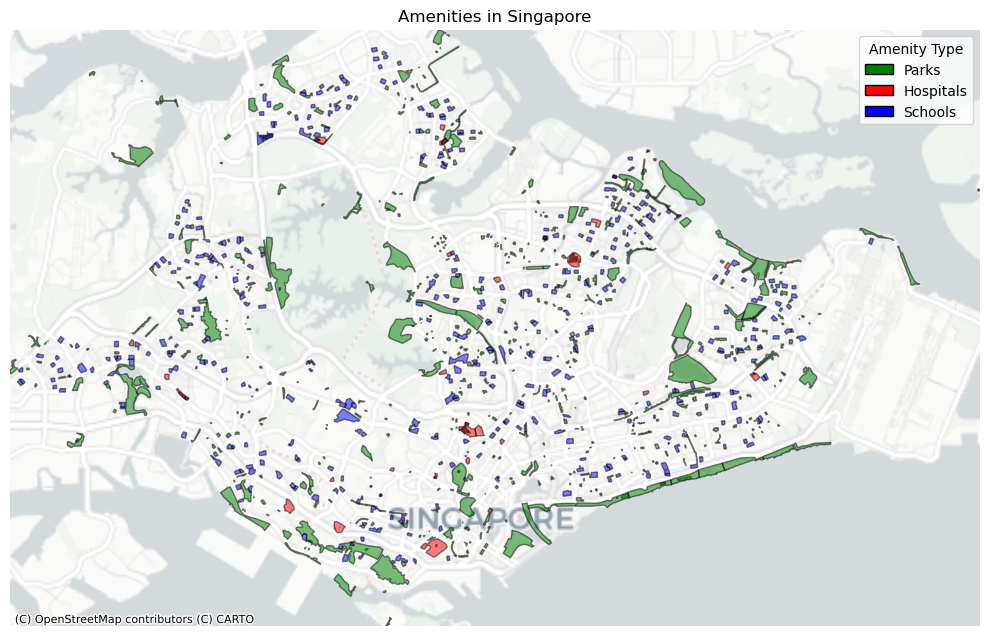

In [48]:
#!pip install contextily

import matplotlib.pyplot as plt
import contextily as ctx
from matplotlib.patches import Patch

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Ensure data is in the same CRS as the basemap (Web Mercator)
all_parks_wm = all_parks.to_crs(epsg=3857)
all_hospitals_wm = all_hospitals.to_crs(epsg=3857)
all_schools_wm = all_schools.to_crs(epsg=3857)

# Plot each GeoDataFrame
all_parks_wm.plot(ax=ax, color='green', alpha=0.5, edgecolor='k')
all_hospitals_wm.plot(ax=ax, color='red', alpha=0.5, edgecolor='k')
all_schools_wm.plot(ax=ax, color='blue', alpha=0.5, edgecolor='k')

# Add basemap
ctx.add_basemap(ax, crs=all_parks_wm.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Customizations
ax.set_title('Amenities in Singapore')
ax.set_axis_off()  # Turn off the axis

# Create legend
legend_labels = [
    Patch(facecolor='green', edgecolor='k', label='Parks'),
    Patch(facecolor='red', edgecolor='k', label='Hospitals'),
    Patch(facecolor='blue', edgecolor='k', label='Schools')
]
ax.legend(handles=legend_labels, title='Amenity Type')

# Ensure everything is visible in the plot
ax.set_xlim(all_parks_wm.total_bounds[[0, 2]])
ax.set_ylim(all_parks_wm.total_bounds[[1, 3]])

plt.tight_layout()
plt.show()

Then, we find the **Euclidean spatial distance** of each flat to the nearest school, hospital and park and we add those as an individual column to the dataframe. 

We are well aware of the limitations of this approach - choosing to calculate distances from the graph of Singapore's road network might have been a more fitting approach, however, given the size of the data, this would not have been possible in our given timeframe.

The (air) distance to the identified amenities can still be deemed as an important indicator of a property's attractiveness and, by extension, its final price, given the fact that "clusters" of amenities might indicate how attractive an area is in general.

We calculate this distance using the native methods found in the `GeoPandas` package:

In [49]:
# Find distance to nearest park, school and hospital for each flat

import time
start_time = time.time()  # Start time

from shapely.ops import nearest_points

# Ensure all GeoDataFrames are in the same CRS, preferably a metric one for distance calculation
crs = 'EPSG:3414'  # Using Singapore's SVY21 projection which is in meters
flats_gdf = flats_gdf.to_crs(crs)
all_hospitals = all_hospitals.to_crs(crs)
all_schools = all_schools.to_crs(crs)
all_parks = all_parks.to_crs(crs)

# Function to compute minimum distance to nearest feature
def compute_min_distance(from_gdf, to_gdf):
    min_dist_series = from_gdf.geometry.apply(lambda x: to_gdf.distance(x).min())
    return min_dist_series

# Calculate distances and add as new columns
flats_gdf['nearest_school_distance'] = compute_min_distance(flats_gdf, all_schools)
flats_gdf['nearest_hospital_distance'] = compute_min_distance(flats_gdf, all_hospitals)
flats_gdf['nearest_park_distance'] = compute_min_distance(flats_gdf, all_parks)

end_time = time.time()  # End time
print(f"Execution time: {end_time - start_time} seconds")

# Display the updated DataFrame
flats_gdf

Execution time: 17.903823375701904 seconds


,resale_date,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,n_rooms,remaining_lease_days,region,address,latitude,longitude,geometry,nearest_school_distance,nearest_hospital_distance,nearest_park_distance
109306,2020-06-01,SEMBAWANG,5 ROOM,357B,ADMIRALTY DR,11 TO 20,110.00,PREMIUM APARTMENT,2001-01-01,80 years 02 months,...,5,29260,North,"ADMIRALTY DR 357B SEMBAWANG, Singapore",1.45,103.82,POINT (26246.669 47987.663),138.08,3113.11,487.10
73967,2018-10-01,ANG MO KIO,3 ROOM,230,ANG MO KIO AVE 3,11 TO 20,67.00,NEW GENERATION,1978-01-01,58 years 04 months,...,3,21290,North-East,"ANG MO KIO AVE 3 230 ANG MO KIO, Singapore",1.37,103.84,POINT (28510.430 38985.535),82.74,1601.08,336.07
108347,2020-06-01,CHOA CHU KANG,4 ROOM,216,CHOA CHU KANG CTRL,01 TO 10,106.00,MODEL A,1990-01-01,68 years 09 months,...,4,25090,West,"CHOA CHU KANG CTRL 216 CHOA CHU KANG, Singapore",1.38,103.75,POINT (18407.563 40572.675),119.77,3727.90,120.48
39005,2017-02-01,QUEENSTOWN,5 ROOM,27,DOVER CRES,11 TO 20,120.00,STANDARD,1976-01-01,58 years 05 months,...,5,21320,Central,"DOVER CRES 27 QUEENSTOWN, Singapore",1.31,103.78,POINT (22215.794 31965.544),74.07,937.82,720.13
26102,2016-06-01,CLEMENTI,3 ROOM,701,WEST COAST RD,01 TO 10,67.00,NEW GENERATION,1980-01-01,63,...,3,22995,West,"WEST COAST RD 701 CLEMENTI, Singapore",1.31,103.76,POINT (19996.407 32211.208),281.64,2597.99,457.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,2015-07-01,CHOA CHU KANG,5 ROOM,486,CHOA CHU KANG AVE 5,11 TO 20,116.00,IMPROVED,1999-01-01,82,...,5,29930,West,"CHOA CHU KANG AVE 5 486 CHOA CHU KANG, Singapore",1.38,103.74,POINT (17415.314 39724.624),391.96,2716.73,289.68
106087,2020-03-01,PUNGGOL,4 ROOM,265D,PUNGGOL WAY,11 TO 20,92.00,MODEL A,2015-01-01,94 years 03 months,...,4,34400,North-East,"PUNGGOL WAY 265D PUNGGOL, Singapore",1.40,103.90,POINT (35242.747 42970.275),189.42,1091.48,17.28
82748,2019-03-01,HOUGANG,5 ROOM,979A,BUANGKOK CRES,01 TO 10,110.00,IMPROVED,2003-01-01,83 years 04 months,...,5,30415,North-East,"BUANGKOK CRES 979A HOUGANG, Singapore",1.38,103.88,POINT (33552.279 40677.860),576.97,38.39,197.63
83495,2019-03-01,WOODLANDS,4 ROOM,5,MARSILING DR,11 TO 20,90.00,IMPROVED,1974-01-01,54 years 05 months,...,4,19860,North,"MARSILING DR 5 WOODLANDS, Singapore",1.45,103.77,POINT (21243.142 47490.967),544.22,3187.13,129.42


In [51]:
#flats_gdf['month'] = pd.to_datetime(flats_gdf['month'])

In [52]:
# We then export the newly constructed subset into a dataset of its own,
# which helped us with executing the exercises (clustering, classification, regression)
# separately in our notebooks
# flats_gdf.to_csv("./flats_gdf.csv")

#### 3.2.3 Visual Exploration <a id="sub_section_3_2_3"></a>

In this stage, we would like to visually explore (i.e., using graphs, barplots, scatterplots) the now pre-processed and feature engineered dataset spanning from years 2015-2020.

In [53]:
# flats_gdf = pd.read_csv("flats_gdf.csv")
flats_gdf.head()

,resale_date,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,n_rooms,remaining_lease_days,region,address,latitude,longitude,geometry,nearest_school_distance,nearest_hospital_distance,nearest_park_distance
109306,2020-06-01,SEMBAWANG,5 ROOM,357B,ADMIRALTY DR,11 TO 20,110.00,PREMIUM APARTMENT,2001-01-01,80 years 02 months,...,5,29260,North,"ADMIRALTY DR 357B SEMBAWANG, Singapore",1.45,103.82,POINT (26246.669 47987.663),138.08,3113.11,487.10
73967,2018-10-01,ANG MO KIO,3 ROOM,230,ANG MO KIO AVE 3,11 TO 20,67.00,NEW GENERATION,1978-01-01,58 years 04 months,...,3,21290,North-East,"ANG MO KIO AVE 3 230 ANG MO KIO, Singapore",1.37,103.84,POINT (28510.430 38985.535),82.74,1601.08,336.07
108347,2020-06-01,CHOA CHU KANG,4 ROOM,216,CHOA CHU KANG CTRL,01 TO 10,106.00,MODEL A,1990-01-01,68 years 09 months,...,4,25090,West,"CHOA CHU KANG CTRL 216 CHOA CHU KANG, Singapore",1.38,103.75,POINT (18407.563 40572.675),119.77,3727.90,120.48
39005,2017-02-01,QUEENSTOWN,5 ROOM,27,DOVER CRES,11 TO 20,120.00,STANDARD,1976-01-01,58 years 05 months,...,5,21320,Central,"DOVER CRES 27 QUEENSTOWN, Singapore",1.31,103.78,POINT (22215.794 31965.544),74.07,937.82,720.13
26102,2016-06-01,CLEMENTI,3 ROOM,701,WEST COAST RD,01 TO 10,67.00,NEW GENERATION,1980-01-01,63,...,3,22995,West,"WEST COAST RD 701 CLEMENTI, Singapore",1.31,103.76,POINT (19996.407 32211.208),281.64,2597.99,457.48


C:\Users\I745534\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


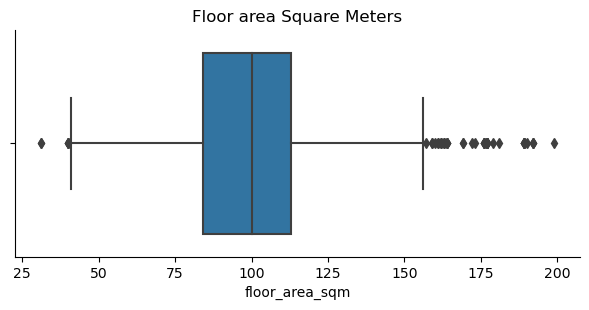

In [54]:
# Plot the boxplot
g = sns.catplot(x="floor_area_sqm", kind="box", data=flats_gdf, aspect=2, height=3)

# Set the title
plt.title("Floor area Square Meters")

# Show the plot
plt.show()

In [55]:
# Calculating the lower-, upper-, interquartiles, and the fences
q1 = flats_gdf["floor_area_sqm"].quantile(0.25)
q3 = flats_gdf["floor_area_sqm"].quantile(0.75)
iqr = q3 - q1
lower_fence = q1 - (1.5 * iqr)
upper_fence = q3 + (1.5 * iqr)

print("Q1:", q1, "\n"
      "Q3:", q3, "\n"
      "IQR:", iqr, "\n"
      "LF:", lower_fence, "\n"
      "UF:", upper_fence)

Q1: 84.0 
Q3: 113.0 
IQR: 29.0 
LF: 40.5 
UF: 156.5


C:\Users\I745534\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


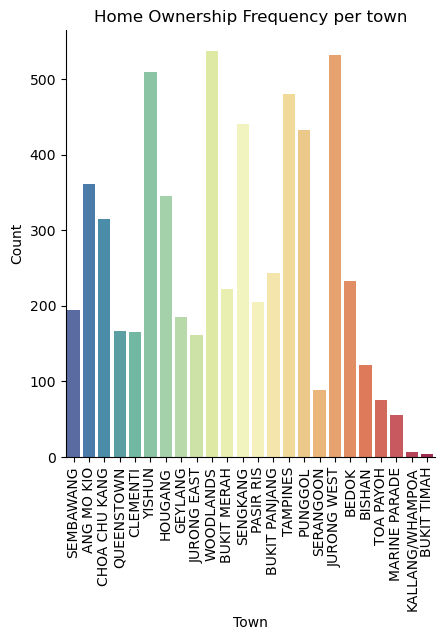

In [56]:
# Plot the catplot
g = sns.catplot(x="town", kind="count", data=flats_gdf, height=5, palette="Spectral_r")

g.set_xticklabels(rotation=90)

# Set the labels and title
plt.xlabel("Town")
plt.ylabel("Count")
plt.title("Home Ownership Frequency per town")

# Show the plot
plt.show()

C:\Users\I745534\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


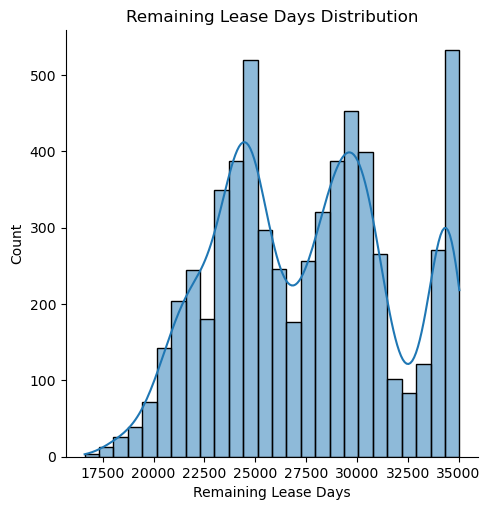

In [76]:
# Plot the distribution plot
import seaborn as sns
flats_gdf['remaining_lease_days'] = flats_gdf['remaining_lease_days'].astype(float)
g = sns.displot(x = "remaining_lease_days", data=flats_gdf, kde=True, height=5)

# Set the labels and title
plt.xlabel("Remaining Lease Days")
plt.title("Remaining Lease Days Distribution")

plt.show()

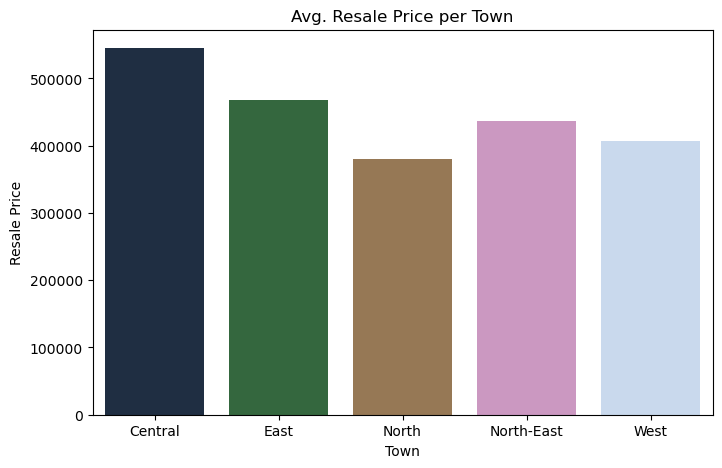

In [77]:
average_resale_price_per_region = flats_gdf.groupby("region")["resale_price"].mean().reset_index()

plt.figure(figsize=(8, 5))

# Plot the barplot
sns.barplot(x="region", y="resale_price", data=average_resale_price_per_region, palette="cubehelix")
    
# Set the labels and title
plt.xlabel("Town")
plt.ylabel("Resale Price")
plt.title("Avg. Resale Price per Town")

# Show the plot
plt.show()

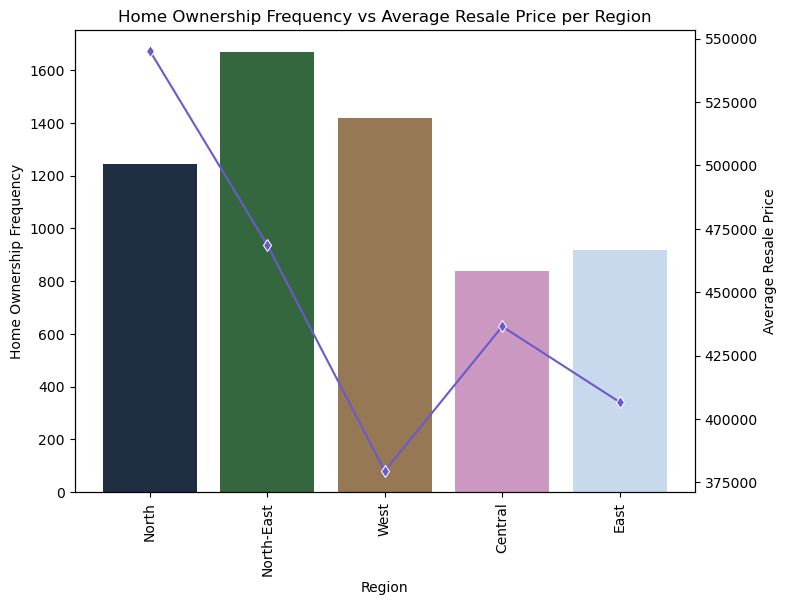

In [78]:
# Exploring the relation between the resale frequency and the average price 

fig, ax1 = plt.subplots(figsize=(8, 6))

# Primary y-axis - frequency 
sns.countplot(x="region", data=flats_gdf, palette="cubehelix", ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel("Region")
ax1.set_ylabel("Home Ownership Frequency")
ax1.set_title("Home Ownership Frequency vs Average Resale Price per Region")

# Secondary y-axis - average resale price
ax2 = ax1.twinx()

# Plot the line chart on the secondary y-axis
sns.lineplot(x="region", y="resale_price", data=average_resale_price_per_region, ax=ax2, color='slateblue', marker='d')
ax2.set_ylabel("Average Resale Price")

# Show the combined plot
plt.show()

C:\Users\I745534\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


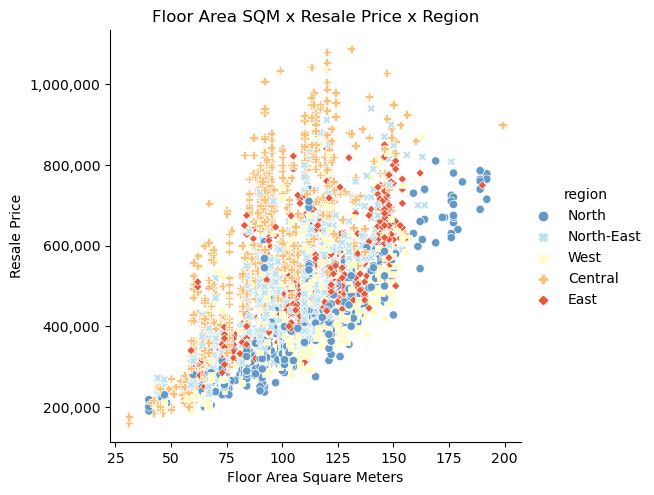

In [79]:
# Required for switching off the scientific notation on y-axis
from matplotlib.ticker import FuncFormatter

# Plot the relational plot
g = sns.relplot(x="floor_area_sqm", y="resale_price", data=flats_gdf, kind="scatter", 
                hue="region", style="region", palette="RdYlBu_r")

# Fixing the scientific notation
g.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Set the labels and title
plt.title("Floor Area SQM x Resale Price x Region")
plt.xlabel("Floor Area Square Meters")
plt.ylabel("Resale Price")

plt.show()

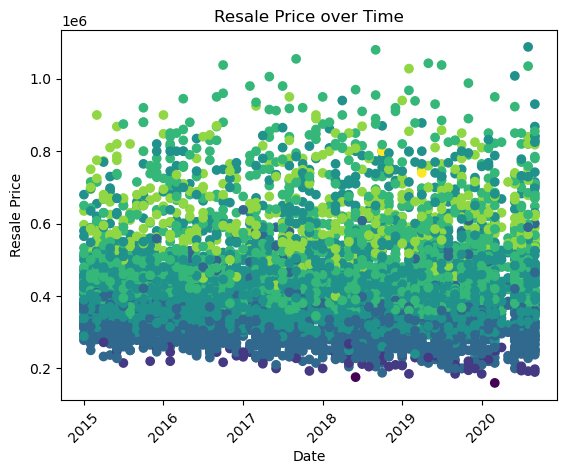

In [143]:
# flats_gdf['month'] = pd.to_datetime(flats_gdf['month'])

plt.scatter(flats_gdf['resale_date'], flats_gdf['resale_price'],
    c=flats_gdf['flat_type'].astype('category').cat.codes, 
)
plt.xlabel('Month')
plt.ylabel('Resale Price')
plt.xlabel('Date')
plt.ylabel('Resale Price')
plt.title('Resale Price over Time')
plt.xticks(rotation=45)
plt.show()

### 3.3 Clustering <a id="section_3_3"></a>

**Author:** Peter Kováč, h12011280

Given the number of numerical variables (originally present or engineered) we have in the dataset, clustering might be one of the prime ways to better understand the underlying data we will then apply more complex models to. In this section, we will apply the following clustering algorithms:

- k-means
- DBSCAN

In [82]:
sum(flats_gdf.isnull().sum()) # One more check for NaNs

0

First, we get the data into correct shape for clustering - this means encoding categorical variables and scaling the numerical ones. For the sake of both relative simplicity and interpretability of the results, we limit the number of variables we (potentially) take into account in our clustering approach, as visible in the cell below.

Note that we stick to standard scaling even though other techniques, such as min-max might also be an option here.

In [83]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# We select the variables of interest for clustering
flats_cluster = flats_gdf[["storey_range", "floor_area_sqm", "resale_price", "remaining_lease_days", 
                           "region", "nearest_school_distance", "nearest_hospital_distance", "nearest_park_distance"]]

categorical_cols = ["storey_range", "region"]
numerical_cols = ["floor_area_sqm", "resale_price", "remaining_lease_days", 
                  "nearest_school_distance", "nearest_hospital_distance", "nearest_park_distance"]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

flats_preprocessed = preprocessor.fit_transform(flats_cluster)

# Return colnmaes
encoded_cat_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
new_col_names = list(numerical_cols) + list(encoded_cat_cols)

preprocessed_df = pd.DataFrame(flats_preprocessed, columns=new_col_names)

preprocessed_df

,floor_area_sqm,resale_price,remaining_lease_days,nearest_school_distance,nearest_hospital_distance,nearest_park_distance,storey_range_01 TO 10,storey_range_11 TO 20,storey_range_21 TO 30,storey_range_31 TO 40,storey_range_41 TO 51,region_Central,region_East,region_North,region_North-East,region_West
0,0.46,0.04,0.41,-0.43,1.39,1.36,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
1,-1.36,-1.17,-1.45,-0.82,0.10,0.50,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,0.29,-0.59,-0.57,-0.56,1.92,-0.73,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,0.88,2.12,-1.45,-0.89,-0.46,2.69,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
4,-1.36,-1.06,-1.06,0.60,0.95,1.19,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6082,0.71,-0.31,0.57,1.39,1.05,0.23,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
6083,-0.30,0.44,1.61,-0.06,-0.33,-1.32,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
6084,0.46,-0.36,0.68,2.72,-1.23,-0.29,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
6085,-0.39,-1.42,-1.79,2.49,1.46,-0.68,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


#### 3.3.1 K-means clustering <a id="sub_section_3_3_1"></a>

As promised, we start with k-means clustering. We will start with 5 clusters as a starting value.

In [84]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)

The first approach will be a simple one, mainly aimed at understanding the similarities in the underlying dataset based on numerical variables we might a priori deem as potentially important for the clustering. In this concrete example, we pick a flat's area in square meters (`floor_area_sqm`) and it's resale price (`resale_price`) to see how the k-means algorithm fares in such a simple setting:

In [85]:
kmeans_labels = kmeans.fit_predict(preprocessed_df[["floor_area_sqm", "resale_price"]])
flats_cluster['kmeans_cluster'] = kmeans_labels

flats_cluster.kmeans_cluster.value_counts()

C:\Users\I745534\AppData\Local\Temp\ipykernel_18188\1977421178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flats_cluster['kmeans_cluster'] = kmeans_labels


kmeans_cluster
3    2285
0    1431
1    1426
2     482
4     463
Name: count, dtype: int64

C:\Users\I745534\AppData\Local\Temp\ipykernel_18188\3717176628.py:3: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.scatterplot(data=flats_cluster,


<Axes: xlabel='floor_area_sqm', ylabel='resale_price'>

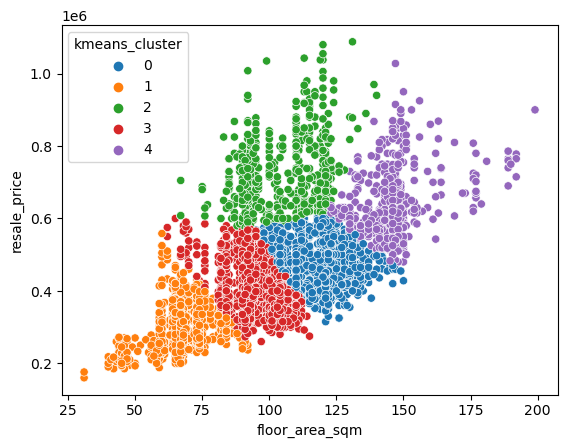

In [86]:
from seaborn import scatterplot

sns.scatterplot(data=flats_cluster, 
                x="floor_area_sqm", 
                y="resale_price", 
                hue="kmeans_cluster",
               palette = sns.color_palette("tab10", 8))

We can see that based on these two variables, the algorithm has split the dataset into 3 large clusters and 2 smaller ones, all of which follow relatively linear distributions along both axes, as expected with the k-means.

Due to this disproportionate size of clusters, we might attempt to find the right number of them using the sum of squares, as per the cell(s) below:

<Axes: xlabel='K', ylabel='sum_of_squares'>

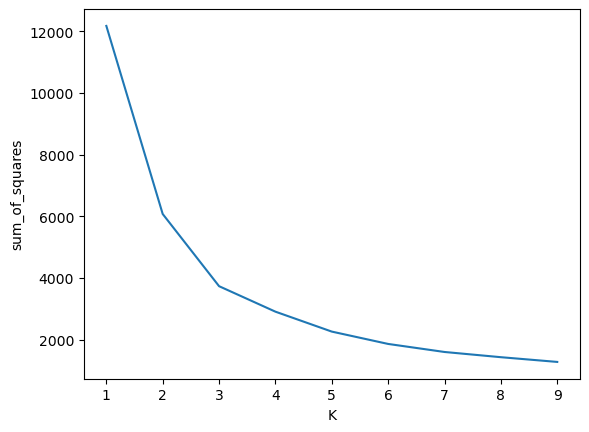

In [87]:
sum_of_squares = []

K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10,
                    random_state=42).fit(preprocessed_df[["floor_area_sqm", "resale_price"]])
    sum_of_squares.append(kmeans.inertia_)

sum_of_squares_frame = pd.DataFrame({"K":K, "sum_of_squares": sum_of_squares})

sns.lineplot(data=sum_of_squares_frame, x="K", y="sum_of_squares")

Judging from the plot above and based on the "elbow" method, 3 seems like it might be a good number of clusters, which is also rather intuitive based on the visualisation we have achieved above. Therefore, we repeat our original algorithm:

C:\Users\I745534\AppData\Local\Temp\ipykernel_18188\1809053568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flats_cluster['kmeans_cluster'] = kmeans_labels
C:\Users\I745534\AppData\Local\Temp\ipykernel_18188\1809053568.py:6: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(data=flats_cluster,


<Axes: xlabel='floor_area_sqm', ylabel='resale_price'>

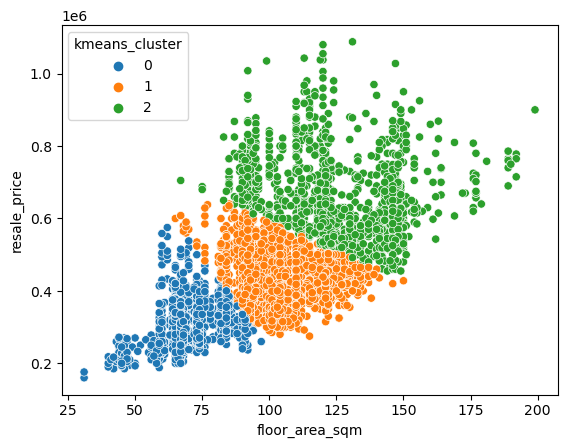

In [88]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

kmeans_labels = kmeans.fit_predict(preprocessed_df[["floor_area_sqm", "resale_price"]])
flats_cluster['kmeans_cluster'] = kmeans_labels

sns.scatterplot(data=flats_cluster, 
                x="floor_area_sqm", 
                y="resale_price", 
                hue="kmeans_cluster",
               palette = sns.color_palette("tab10", 8))

We can explore the differences in these clusters, first in the numerical columns:

In [89]:
flats_cluster.groupby("kmeans_cluster")[numerical_cols].median()

,floor_area_sqm,resale_price,remaining_lease_days,nearest_school_distance,nearest_hospital_distance,nearest_park_distance
kmeans_cluster,,,,,,
0,68.00,306000.00,23815.00,198.32,1085.49,243.93
1,104.00,420000.00,29075.00,159.97,1220.83,206.34
2,124.00,638000.00,28165.00,177.30,1128.38,211.69


... where we can not only see the clear-cut difference in resale price and flat size, as the plot above might already suggest, but we can also see that the flats located in cluster "0" (the smallest and cheapest flats) are also significantly farther away from the nearest school and the nearest park (this is, however, interestingly, not the case for hospitals).

The chosen categorical variables do not tell us much:

In [90]:
print("\nStorey Range distribution for flats in cluster 0:",
      flats_cluster[flats_cluster.kmeans_cluster==0].storey_range.value_counts(),
     "\nStorey Range distribution for flats in cluster 1:",
      flats_cluster[flats_cluster.kmeans_cluster==1].storey_range.value_counts(),
     "\nStorey Range distribution for flats in cluster 2:",
      flats_cluster[flats_cluster.kmeans_cluster==2].storey_range.value_counts())


Storey Range distribution for flats in cluster 0: storey_range
01 TO 10    1175
11 TO 20     498
21 TO 30      15
31 TO 40       3
Name: count, dtype: int64 
Storey Range distribution for flats in cluster 1: storey_range
01 TO 10    2143
11 TO 20    1068
21 TO 30      26
31 TO 40       2
Name: count, dtype: int64 
Storey Range distribution for flats in cluster 2: storey_range
01 TO 10    603
11 TO 20    457
21 TO 30     74
31 TO 40     20
41 TO 51      3
Name: count, dtype: int64


... and neither does the regional distribution

In [91]:
print("\nRegion distribution for flats in cluster 0:",
      flats_cluster[flats_cluster.kmeans_cluster==0].region.value_counts(),
     "\nRegion distribution for flats in cluster 1:",
      flats_cluster[flats_cluster.kmeans_cluster==1].region.value_counts(),
     "\nRegion distribution for flats in cluster 2:",
      flats_cluster[flats_cluster.kmeans_cluster==2].region.value_counts())


Region distribution for flats in cluster 0: region
North-East    421
North         392
West          345
Central       307
East          226
Name: count, dtype: int64 
Region distribution for flats in cluster 1: region
North-East    1016
West           861
North          741
East           433
Central        188
Name: count, dtype: int64 
Region distribution for flats in cluster 2: region
Central       344
East          260
North-East    232
West          211
North         110
Name: count, dtype: int64


Furthermore, we can attempt to cluster based on three variables instead of two and display the outcome in a three-dimensional space. For this purpose, we select the three nearest distance variables we have engineered previously:

<Axes: xlabel='K', ylabel='sum_of_squares'>

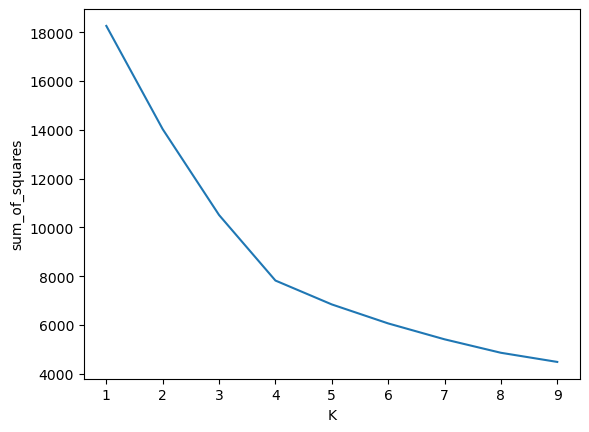

In [92]:
# We find the ideal number of clusters

sum_of_squares = []

K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10,
                    random_state=42).fit(preprocessed_df[["nearest_school_distance", "nearest_hospital_distance", "nearest_park_distance"]])
    sum_of_squares.append(kmeans.inertia_)

sum_of_squares_frame = pd.DataFrame({"K":K, "sum_of_squares": sum_of_squares})

sns.lineplot(data=sum_of_squares_frame, x="K", y="sum_of_squares")

C:\Users\I745534\AppData\Local\Temp\ipykernel_18188\3369836857.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flats_cluster['kmeans_cluster'] = kmeans_labels


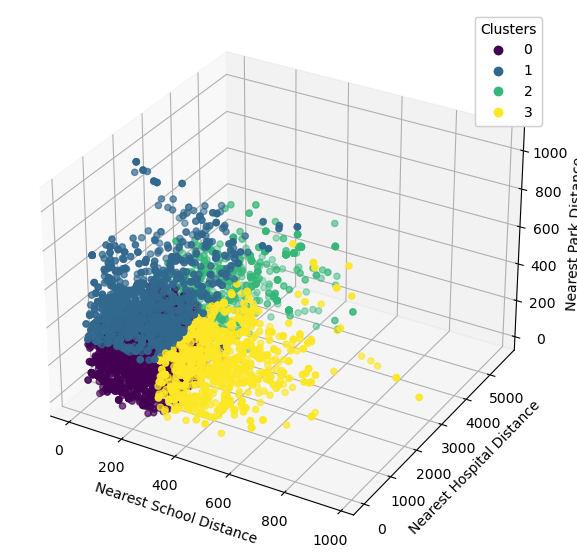

In [93]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ... it seems to be 4
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(preprocessed_df[["nearest_school_distance", "nearest_hospital_distance", "nearest_park_distance"]])
flats_cluster['kmeans_cluster'] = kmeans_labels

flats_cluster_plot = flats_cluster[flats_cluster.nearest_school_distance<1500] # Outlier messed up the plot

# 3D Visualization
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(flats_cluster_plot['nearest_school_distance'], 
                     flats_cluster_plot['nearest_hospital_distance'], 
                     flats_cluster_plot['nearest_park_distance'], 
                     c=flats_cluster_plot['kmeans_cluster'], cmap='viridis')

# Add labels
ax.set_xlabel('Nearest School Distance')
ax.set_ylabel('Nearest Hospital Distance')
ax.set_zlabel('Nearest Park Distance')

# Add a legend
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

... we see that based on these three indicators, we are provided with an interesting overview, which, however, does not split the dataset significantly when it comes to the other variables of interest:

In [94]:
flats_cluster.groupby("kmeans_cluster")[numerical_cols].median()

,floor_area_sqm,resale_price,remaining_lease_days,nearest_school_distance,nearest_hospital_distance,nearest_park_distance
kmeans_cluster,,,,,,
0,100.00,425000.00,27740.00,120.77,1177.85,137.05
1,94.00,408000.00,27555.00,142.28,763.07,413.66
2,104.00,380000.00,29425.00,185.62,3892.03,207.08
3,93.00,410000.00,25185.00,372.78,1136.03,202.77


#### 3.3.2 DBSCAN <a id="sub_section_3_3_2"></a>

Then, we continue with DBSCAN, a density-based scanning method that works differently than k-means, beginning at random individual data points and working its way up to form larger clusters. DBSCAN is extremely sensitive to the `eps` value, as well as to the `metric` variable, which is by default set to Euclidean distance. We start with the same initial variables we did in the k-means example:

In [95]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

dbscan_labels = dbscan.fit_predict(preprocessed_df[["floor_area_sqm", "resale_price"]])
flats_cluster['dbscan_cluster'] = dbscan_labels

flats_cluster.dbscan_cluster.value_counts()

C:\Users\I745534\AppData\Local\Temp\ipykernel_18188\3992328622.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flats_cluster['dbscan_cluster'] = dbscan_labels


dbscan_cluster
 0    6083
-1       4
Name: count, dtype: int64

Here we see that with the epsilon value set to 0.5, everything gets put into a single cluster and we therefore try to change both `eps` and `metric` to achieve a more detailed result:

<Axes: xlabel='eps', ylabel='n_clusters'>

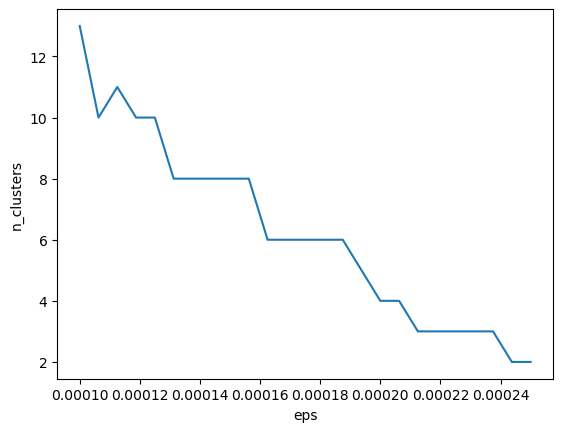

In [96]:
n_clusters = []

epsilson = list(np.linspace(0.0001,0.00025,25))
for k in epsilson:
    dbscan_labels = DBSCAN(eps=k, min_samples=5, metric="cosine").fit_predict(preprocessed_df[["floor_area_sqm", "resale_price"]])
    n_clusters.append(len(set(dbscan_labels)))

n_clusters_frame = pd.DataFrame({"eps":epsilson, "n_clusters": n_clusters})

sns.lineplot(data=n_clusters_frame, x="eps", y="n_clusters")

C:\Users\I745534\AppData\Local\Temp\ipykernel_18188\3342726357.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flats_cluster['dbscan_cluster'] = dbscan_labels
C:\Users\I745534\AppData\Local\Temp\ipykernel_18188\3342726357.py:5: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(data=flats_cluster,


<Axes: xlabel='floor_area_sqm', ylabel='resale_price'>

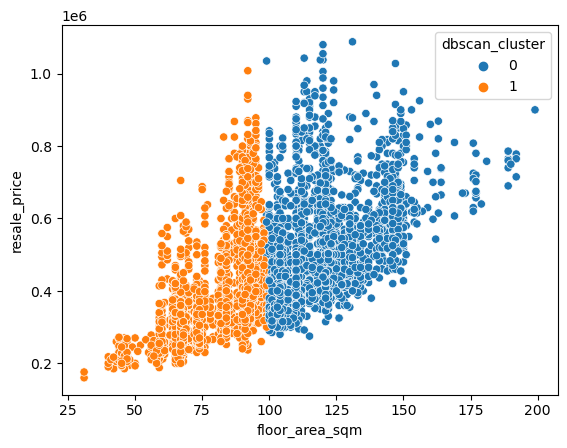

In [97]:
dbscan = DBSCAN(eps=0.00025, min_samples=5, metric="cosine")
dbscan_labels = dbscan.fit_predict(preprocessed_df[["floor_area_sqm", "resale_price"]])
flats_cluster['dbscan_cluster'] = dbscan_labels

sns.scatterplot(data=flats_cluster, 
                x="floor_area_sqm", 
                y="resale_price", 
                hue="dbscan_cluster",
               palette = sns.color_palette("tab10", 8))

... and after a longer period of engineering, we manage to get TWO similarly-distributed clusters from DBSCAN. We try with three variables instead:

<Axes: xlabel='eps', ylabel='n_clusters'>

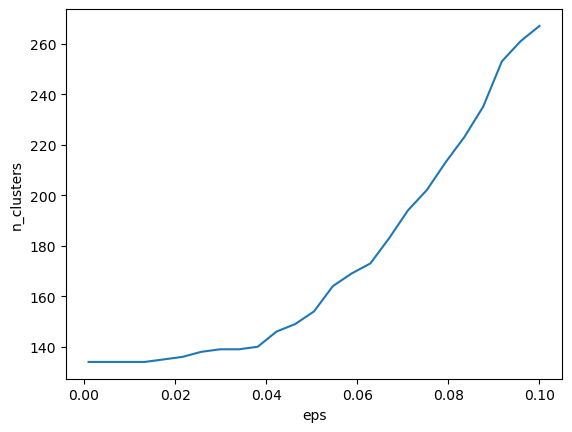

In [98]:
n_clusters = []

epsilson = list(np.linspace(0.001,0.1,25))
for k in epsilson:
    dbscan_labels = DBSCAN(eps=k, min_samples=5).fit_predict(preprocessed_df[["nearest_school_distance", "nearest_hospital_distance", "nearest_park_distance"]])
    n_clusters.append(len(set(dbscan_labels)))

n_clusters_frame = pd.DataFrame({"eps":epsilson, "n_clusters": n_clusters})

sns.lineplot(data=n_clusters_frame, x="eps", y="n_clusters")

However, here, we observe that the data is simply too sparse in this sense in order for the patterns to be picked up on by DBSCAN. We therefore maintain our observsings from the k-means clustering and move on to analysing the data further.

#### Summary of clustering

Research Questions Answered: 

- ***How do variations in key features like floor area and resale price segment the housing market in Singapore?***

Both the floor area and resale price of real estate in Singapore can be used quite effectively to segment the housing market into smaller, clear-cut clusters of flats which then also differ in secondary attributes, especially when it comes to distance to closest amenities (schools/parks/hospitals), as evident mainly in k-means clustering

- ***What patterns and groupings can we identify among flats in Singapore based on proximity to key amenities?***

While clustering based on distance to key amenities like schools, parks and hospitals also provides a clear-cut division of the dataset, this does not reflect much in the secondary attributes when the dataset is split into the four aforementioned clusters.

### 3.4 Regression Modeling <a id="section_3_4"></a>

**Author:** Michaela Macko, h12011903

In this section, we being to explore which variables - and how well - predict the target variable, resale price. Since the price is continuous, we begin with supervised learning models. For each model a train-test split is conducted to account for overfitting. 

We start with a rather simple statistical analysis using the `statsmodels` package in order to gain a first hand overview of the variables and their potential impact.
Afterwards, the following regression models are created and evaluated on their performance using `SKLEARN`:

1. Linear regression
2. K-means regression 
3. Linear regression 
4. LASSO variable selection model 
5. Random Forest 

To undertand whether they might be dependencies between certain variables, we may examine the following correlation matrix: 

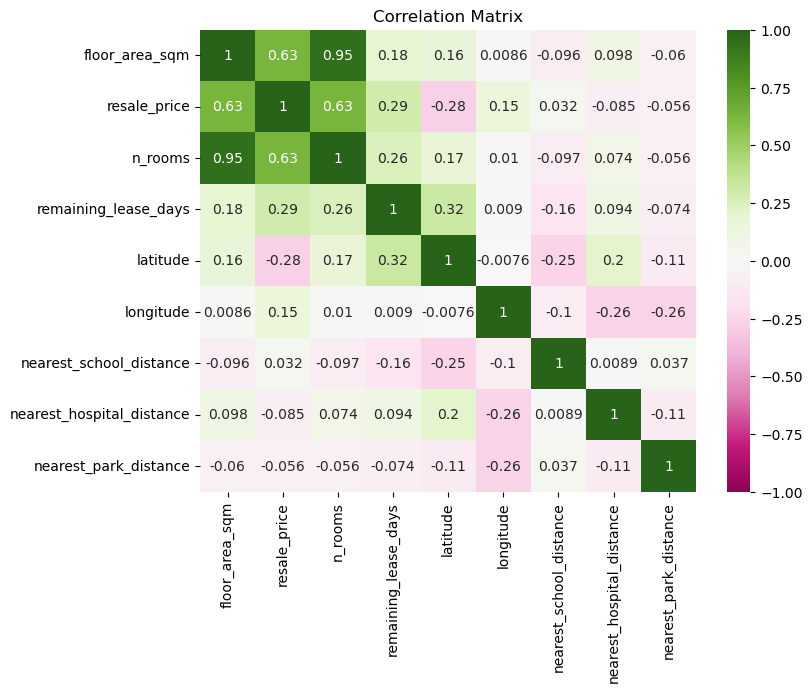

In [99]:
flats_gdf_num = flats_gdf.select_dtypes(include=[np.number]).columns
flats_gdf_num = flats_gdf[flats_gdf_num]
corr_matrix = flats_gdf_num.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="PiYG", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

As indicated already during clustering, flat size, *floor_area_sqm*, is noticeably correlated with the *resale_price*. Remaining lease days and number of rooms are also weakly correlated with the target variable. *Latitude* and *longitude* are worth paying attention to, however, in later analysis, *town* and *region* are examined instead. 

#### 3.4.1 Statsmodel <a id="sub_section_3_4_1"></a>

First, we perform basic linear regression using the `statsmodels` package, to identify variable "suspects". 
Below, we formualate a simple function for filtering the significant, high-$\beta$ variables.

In [100]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

def get_significant_coefficients(linear_reg_fit, significance_level=0.05):
    # Extract the summary table from the linear regression fit
    summary_table = linear_reg_fit.summary2().tables[1].reset_index()
    
    # Renaming columns for clarity
    summary_table = summary_table.rename(columns={'index': 'Feature', 'Coef.': 'Coefficient', 'P>|t|': 'PValue'})
    summary_table["Coefficient_abs"] = abs(summary_table["Coefficient"])
    
    # Filtering significant variables
    significant_vars = summary_table[summary_table['PValue'] < significance_level]
    
    return significant_vars

..and now - finally the first statistics:

In [101]:
# We use ordinary least sqaure method: 
linear_reg = smf.ols(formula="resale_price ~ flat_model + storey_range + floor_area_sqm+n_rooms+remaining_lease_days+ +town +region + nearest_school_distance+nearest_hospital_distance+nearest_park_distance", data=flats_gdf)    # Describe model
# and estimate the parameters based on the available data X and y
linear_reg_fit = linear_reg.fit()
linear_reg_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           resale_price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     719.0
Date:                Fri, 21 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:01:17   Log-Likelihood:                -75099.
No. Observations:                6087   AIC:                         1.503e+05
Df Residuals:                    6041   BIC:                         1.506e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                          -1.041e+05   1.47e+04     -7.079      0.000   -1.33e+05   -7.53e+04
flat_model[T.APARTMENT]            -6.839e+04   1.38e+04     -4.956      0.000   -9.54e+04   -4.13e+04
flat_model[T.DBSS]                  3.879e+04   1.55e+04      2.496      0.013    8317.650    6.93e+04
flat_model[T.EXECUTIVE MAISONETTE]  6.169e+04   2.82e+04      2.190      0.029    6461.187    1.17e+05
flat_model[T.IMPROVED]             -9.653e+04   1.35e+04     -7.156      0.000   -1.23e+05   -7.01e+04
flat_model[T.MAISONETTE]             -3.5e+04   1.39e+04     -2.517      0.012   -6.23e+04   -7736.095
flat_model[T.MODEL A]               -9.57e+04   1.36e+04     -7.041      0.000   -1.22e+05   -6.91e+04
flat_model[T.MODEL A2]             -1.001e+05   1.46e+04     -6.855      0.000   -1.29e+05   -7.15e+04
flat_model[T.MULTIGENERATION]       5.197e+04   4.14e+04      1.256      0.209   -2.92e+04    1.33e+05
flat_model[T.NEW GENERATION]       -8.283e+04   1.37e+04     -6.041      0.000    -1.1e+05   -5.59e+04
flat_model[T.PREMIUM APARTMENT]    -8.465e+04   1.37e+04     -6.171      0.000   -1.12e+05   -5.78e+04
flat_model[T.SIMPLIFIED]           -8.204e+04   1.41e+04     -5.799      0.000    -1.1e+05   -5.43e+04
flat_model[T.STANDARD]             -6.281e+04   1.46e+04     -4.292      0.000   -9.15e+04   -3.41e+04
storey_range[T.11 TO 20]            2.939e+04   1556.938     18.878      0.000    2.63e+04    3.24e+04
storey_range[T.21 TO 30]            1.009e+05   5600.309     18.022      0.000       9e+04    1.12e+05
storey_range[T.31 TO 40]            1.365e+05   1.16e+04     11.812      0.000    1.14e+05    1.59e+05
storey_range[T.41 TO 51]            1.444e+05   3.23e+04      4.477      0.000    8.12e+04    2.08e+05
town[T.BEDOK]                       7110.6445   3131.436      2.271      0.023     971.913    1.32e+04
town[T.BISHAN]                      4.361e+04   5953.117      7.326      0.000    3.19e+04    5.53e+04
town[T.BUKIT MERAH]                 5.299e+04   4811.287     11.015      0.000    4.36e+04    6.24e+04
town[T.BUKIT PANJANG]              -5.743e+04   4586.490    -12.521      0.000   -6.64e+04   -4.84e+04
town[T.BUKIT TIMAH]                 1.195e+05   2.56e+04      4.665      0.000    6.93e+04     1.7e+05
town[T.CHOA CHU KANG]              -1.017e+05   4062.918    -25.027      0.000    -1.1e+05   -9.37e+04
town[T.CLEMENTI]                    1.059e+05   4003.234     26.446      0.000     9.8e+04    1.14e+05
town[T.GEYLANG]                    -2.302e+04   5109.867     -4.504      0.000    -3.3e+04    -1.3e+04
town[T.HOUGANG]                    -7.823e+04   4512.041    -17.339      0.000   -8.71e+04   -6.94e+04
town[T.JURONG EAST]                 5803.0319   4774.730      1.215      0.224   -3557.142    1.

Although the model includes rather high amount of variables, the difference between $R^2$ and adjusted $R^2$ is negligible, suggesting we do not necessarily need to remove the variables. Although most of the variables have a significantly low p-value, it is surprising that distances to the nearest school, hospital or park are weakly or not at all significant. Below, we list variables with the strongest coefficients. 

In [102]:
get_significant_coefficients(linear_reg_fit).head(10)

,Feature,Coefficient,Std.Err.,t,PValue,[0.025,0.975],Coefficient_abs
0,Intercept,-104111.35,14707.08,-7.08,0.00,-132942.48,-75280.22,104111.35
1,flat_model[T.APARTMENT],-68393.44,13800.44,-4.96,0.00,-95447.23,-41339.64,68393.44
2,flat_model[T.DBSS],38785.26,15541.87,2.50,0.01,8317.65,69252.87,38785.26
3,flat_model[T.EXECUTIVE MAISONETTE],61692.28,28174.00,2.19,0.03,6461.19,116923.37,61692.28
4,flat_model[T.IMPROVED],-96528.09,13489.45,-7.16,0.00,-122972.23,-70083.95,96528.09
5,flat_model[T.MAISONETTE],-35002.23,13908.76,-2.52,0.01,-62268.37,-7736.09,35002.23
6,flat_model[T.MODEL A],-95699.21,13592.34,-7.04,0.00,-122345.04,-69053.38,95699.21
7,flat_model[T.MODEL A2],-100148.20,14610.06,-6.85,0.00,-128789.13,-71507.27,100148.20
9,flat_model[T.NEW GENERATION],-82825.53,13709.64,-6.04,0.00,-109701.31,-55949.74,82825.53
10,flat_model[T.PREMIUM APARTMENT],-84652.73,13717.71,-6.17,0.00,-111544.34,-57761.12,84652.73


Based on this analysis, the physical parameters of the flat seem to be the most important one with respect to the resale price, followed by the geodemographic ones (town).

#### 3.4.2 SK-Learn <a id="sub_section_3_4_2"></a>

Using the "variable suspects" from the statsmodel, we put the `SKLEARN` package to use, implementing a linear regression, a k-means regression, a LASSO variable selection model as well as a random forest to achieve our desired results.

Namely, we primarily focus on the following variables as predictors for the resale price: 

**Physical aspects:**
- ⁠floor_area_sqm
- ⁠number of rooms
- flat type 
- storey range 

**Geodemographical aspects:**
- ⁠distance from nearest school/park/hospital
- town
- region 
- block 

**Practical:**
- remaining lease days


In the scope of this notebook, we do not perform a time-based predictive analysis.

Additionally, we leverage the (amended) briliant functions presented to us in lectures, to swiftly compute and visualize the performance measures of each model: 

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, median_absolute_error, r2_score, explained_variance_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# For analyzing and comparing performance
def regression_report(y_true, y_pred):

    error = y_true - y_pred
    
    metrics = [
        ('r2 score', r2_score(y_true, y_pred)),
        ('mean squared error', mean_squared_error(y_true, y_pred)),
        ('mean absolute error', mean_absolute_error(y_true, y_pred)),
        ('median absolute error', median_absolute_error(y_true, y_pred)),
        ('max error', max_error(y_true, y_pred))
    ]
    
    for metric_name, metric_value in metrics:
        print(f'{metric_name:>25s}: {metric_value: >20.3f}')
        
# For visualization 
        
from sklearn.metrics import PredictionErrorDisplay

def prediction_error_display(regressor, X, y_true):
    fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
    PredictionErrorDisplay.from_estimator(regressor, X, y_true, kind="actual_vs_predicted", ax=axs[0])
    PredictionErrorDisplay.from_estimator(regressor, X, y_true, kind="residual_vs_predicted", ax=axs[1])
    plt.tight_layout()
    plt.show()

Then, we establish the train test split base in order to reliably compare different models. We randomly allocate 80% to the trianing data, leaving 20% for testing. 

In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


flats_gdf_1 = flats_gdf.loc[:, ["resale_price", "n_rooms", "storey_range", "flat_model", "floor_area_sqm", "town", "region", "remaining_lease_days", "nearest_school_distance", "nearest_hospital_distance", "nearest_park_distance"]]
flats_gdf_1.dropna(inplace=True)
flats_gdf_1 = pd.get_dummies(flats_gdf_1)


# Train test split: using a randomly selected 80% of observations as training data, and 20%  as test
training, test = train_test_split(flats_gdf_1, test_size=.2, random_state = 88)

X_train = training.loc[:,training.columns != "resale_price"]
y_train = training[["resale_price"]].values.ravel()

X_test = test.loc[:,test.columns != "resale_price"]
y_test = test[["resale_price"]].values.ravel()

##### 3.4.2.1 Linear regression <a id="sub_section_3_4_2_1"></a>

# Training set
                 r2 score:                0.844
       mean squared error:       3027423541.002
      mean absolute error:            42300.769
    median absolute error:            34278.621
                max error:           371509.696

# Test set
                 r2 score:                0.835
       mean squared error:       3169435221.136
      mean absolute error:            43141.297
    median absolute error:            34919.034
                max error:           266613.639

Average cross-validation score (RMSE):  55869.77128026593


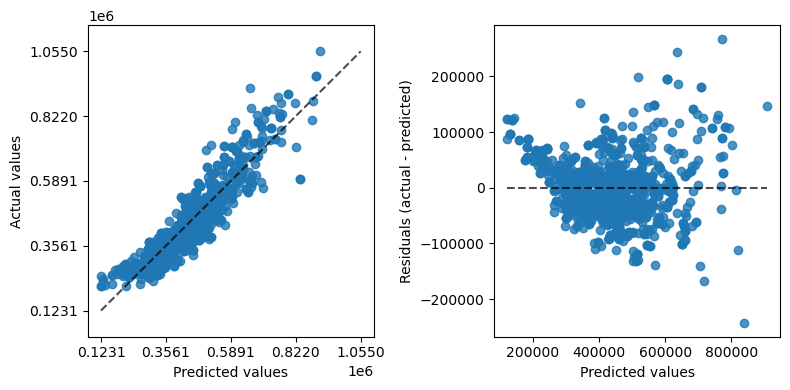

In [105]:
# Linear regression

# Training the model (fitting the model)
linear_reg = LinearRegression().fit(X_train, y_train)

# Testing the model (letting the model predict the outcome on the training and test sets) 
linear_reg_pred_train = linear_reg.predict(X_train) # for the training data
linear_reg_pred = linear_reg.predict(X_test) # for the test data

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

print("# Training set")
regression_report(y_train, linear_reg_pred_train)

print("\n# Test set")
regression_report(y_test, linear_reg_pred)

# both are equally bad 

from sklearn.model_selection import cross_val_score

errors = cross_val_score(linear_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Take a square root of each cross validation score (as we are dealing with MSE) and take an average
rmse = np.mean((np.absolute(errors)))**(1/2)

print('\nAverage cross-validation score (RMSE): ', rmse)

prediction_error_display(linear_reg, X_test, y_test)

With respect to linear regression, `SKLEARN` did not introduce any especially new insight into. Although $R^2$ is relatively high, indicating a good fit for the model, the resual spread is rather vast. Linear regression is a rather simple predictive method, which, together with the large MSE and MAE further indicates that exploration of other types of regressions should take place. 



##### 3.4.2.2 LASSO variable selection<a id="sub_section_3_4_2_2"></a>

LASSO is an advanced type of linear regression which introduces L1 regularization. Namely, it adds a penalty equal to the absolute value of the magnitude of coefficients. It is supposed to regulate and reduce complexity in models through reducing certain coefficients and thus performing feature selection, potentially preventing overfitting.

C:\Users\I745534\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.730e+12, tolerance: 9.441e+09
  model = cd_fast.enet_coordinate_descent(


# Training set
                 r2 score:                0.844
       mean squared error:       3027436444.772
      mean absolute error:            42302.407
    median absolute error:            34290.247
                max error:           371798.787

# Test set
                 r2 score:                0.835
       mean squared error:       3168680323.857
      mean absolute error:            43143.842
    median absolute error:            34928.883
                max error:           266733.457


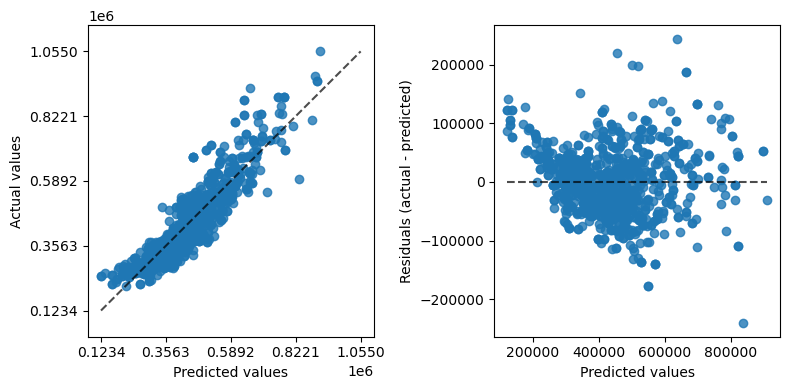

In [106]:
# LASSO in SKLEARN

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# first, we estimate the model parameters on the training data (fitting the model)
lasso_reg = Lasso().fit(X_train, y_train)

# then, we can let the model predict the outcome on the training and test sets
lasso_reg_pred_train = lasso_reg.predict(X_train) # for the training data
lasso_reg_pred = lasso_reg.predict(X_test) # for the test data


# Evaluate
print("# Training set")
regression_report(y_train, lasso_reg_pred_train)
print("\n# Test set")
regression_report(y_test, lasso_reg_pred)

# Display the prediction errors
prediction_error_display(lasso_reg, X_test, y_test)

Results of the LASSO regression model are very similar to the linear regression in sk-learn, bith in terms of errors and $R^2$. However, apart from result interpretation, in case of LASSO, we should look into the variables that were selected and removed from the model. 

In [107]:
# Number of variables 
n_included = np.sum(lasso_reg.coef_ != 0) #included
n_removed = np.sum(lasso_reg.coef_ == 0) #removed 

print(f"\nNumber of variables included in the model: {n_included}")
print(f"Number of variables removed from the model: {n_removed}")
removed_variables = X_train.columns[lasso_reg.coef_ == 0]
included_variables = X_train.columns[lasso_reg.coef_ != 0]
coefficients = lasso_reg.coef_[lasso_reg.coef_ != 0]

print(f"Removed variable(s): {removed_variables}")


Number of variables included in the model: 52
Number of variables removed from the model: 1
Removed variable(s): Index(['town_HOUGANG'], dtype='object')


The only deleted variables is the town of Hougang. This is quite interesting, it suggest that althogh the model has many variables, almost none of them was removed and thus determined to be hamrful towards the model's performance. Hence, we decide to keep all the variables in the model as they are. 
Furthermore, we explore the remaining variables and their respective coefficients.

In [108]:
included_variables_df = pd.DataFrame({'Included Variables': included_variables, 'Coefficients': coefficients, 'Coefficients_abs' :abs(coefficients)})
included_variables_df=included_variables_df.sort_values(by='Coefficients_abs', ascending=False)
included_variables_df.head(20)

,Included Variables,Coefficients,Coefficients_abs
29,town_BUKIT TIMAH,203712.78,203712.78
10,storey_range_41 TO 51,181010.83,181010.83
36,town_MARINE PARADE,175995.45,175995.45
39,town_QUEENSTOWN,160046.62,160046.62
14,flat_model_EXECUTIVE MAISONETTE,144653.08,144653.08
27,town_BUKIT MERAH,142609.46,142609.46
42,town_SERANGOON,131536.88,131536.88
26,town_BISHAN,127261.74,127261.74
31,town_CLEMENTI,119953.42,119953.42
13,flat_model_DBSS,115007.52,115007.52


Just as the model performance, results look fairly similar to our initial linear regression. We may notice, however, LASSO model highlights the imapct of `town` over `flat_model`, indicating, that there is some shift in the key categorial determinants of the price from the physical aspects of the house towards its geographical position. 

In [109]:
included_variables_df.loc[included_variables_df['Included Variables'] == 'remaining_lease_days']

,Included Variables,Coefficients,Coefficients_abs
2,remaining_lease_days,12.28,12.28


In [110]:
included_variables_df.loc[included_variables_df['Included Variables'] == 'nearest_hospital_distance']

,Included Variables,Coefficients,Coefficients_abs
4,nearest_hospital_distance,-3.98,3.98


As seen above, based on LASSO, neither one of the variables `remaining_lease_days` and `nearest_hospital_distance` seems highly important of a predictor of the price. 

##### 3.4.2.3 K-Means Regression <a id="sub_section_3_4_2_3"></a>

Linear regression is a fundamental method for modeling regression, however, it is highly dependant on the assumption of single linear relationship in the dataset. This assumption, however, may not always hold true. K-Means regression addresses this issue by incorporating clustering to handle heterogeneousity in datasets. It is particularly useful when the relationship between variables varies across distinct subgroups in the data.

Tuned kNN k neighbors: {'knn__n_neighbors': 3}
Tuned kNN Score: 0.8226316649347114
# Training set
                 r2 score:                0.933
       mean squared error:       1298556415.461
      mean absolute error:            24851.417
    median absolute error:            17555.333
                max error:           322666.667

# Test set
                 r2 score:                0.848
       mean squared error:       2927197294.165
      mean absolute error:            36499.790
    median absolute error:            25333.333
                max error:           389000.000


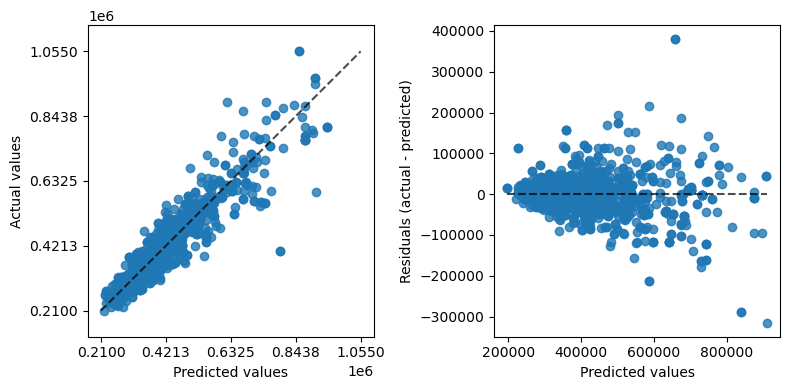

In [111]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Set up pipeline 
pipeline_knn = Pipeline([('scaler', StandardScaler()), 
                         ('knn', KNeighborsRegressor())])

# Further set up the parameters for kNN
parameters_knn = {'knn__n_neighbors':list(range(1,31))}
    
# Fit and tune model
knn_cv = GridSearchCV(pipeline_knn, parameters_knn, cv=5)
knn_cv.fit(X_train, y_train)

# Print out the best number of neighbors
print("Tuned kNN k neighbors: {}".format(knn_cv.best_params_))
print("Tuned kNN Score: {}".format(knn_cv.best_score_))

# Predict
y_pred_knn = knn_cv.predict(X_test)
y_pred_knn_train = knn_cv.predict(X_train)

# Evaluate
print("# Training set")
regression_report(y_train, y_pred_knn_train)
print("\n# Test set")
regression_report(y_test, y_pred_knn)

# Display the prediction errors
prediction_error_display(knn_cv, X_test, y_test)

The K-means regression model fits the training data well, as indicated by the high $R^2$ score. However, the significantly reduced $R^2$ score on the test set suggests overfitting. Similarily, there are higher errors on the test set. Additionally, the residual plot suggests that the model does not capture all the variability in the data, with some systematic errors present.
Although the range of $R^2$ and errors is similar, the difference between train and test data is way higher than in the case of linear regression. LASSO, as per its nature, was significantly less overfitted, altough, in our case, had higher error rates and indicated slightly less accuracy compared to K-means model.

Since neither of these methods seem to become the perfect fit, we abstract form linear regression based models and explore a rather different approach towards predictive analysis, namely, random forest. 

##### 3.4.2.4 Random Forest <a id="sub_section_3_4_2_4"></a>

Random Forest Regression works differently than the regression model. It constructs multiple decision trees during training and outputs the mean prediction of the individual trees for regression tasks. With these two phases, this approach enhances predictive accuracy and controls for overfitting by averaging the results by advanced steps taken (leveraging the diversity of trees generated using bootstrap sampling and random feature selection for splitting nodes). The method usually handles dimensionality effectively, which is usually present in larger datasets. For this reason, combined with results of past queries, we expect this model to fit our data and perform the best. 

Tuned Random Forest Parameters: {'rf__criterion': 'squared_error', 'rf__max_depth': 15, 'rf__n_estimators': 150}
Tuned Random Forest Score: 0.902780467777472
# Training set
                 r2 score:                0.976
       mean squared error:        459047128.136
      mean absolute error:            15819.510
    median absolute error:            11681.304
                max error:           174327.413

# Test set
                 r2 score:                0.908
       mean squared error:       1774512989.910
      mean absolute error:            29311.566
    median absolute error:            21012.583
                max error:           284570.309


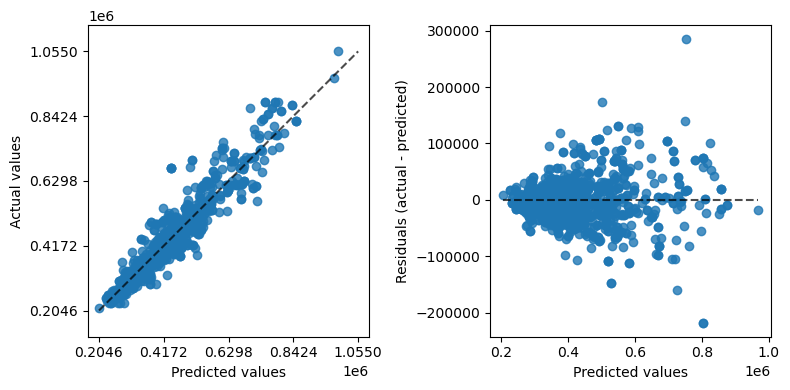

In [112]:
# Random Forest from SKLEARN

from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Set up the regressor
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state = 42))])

# Define parameter grid
parameters_rf = {
    'rf__n_estimators': [50, 100, 150],
    'rf__max_depth': [5, 10, 15],
    'rf__criterion': ['squared_error']
}

# Fit and tune model
rf_cv = GridSearchCV(pipeline_rf, parameters_rf, cv=5)
rf_cv.fit(X_train, y_train)

# Print out the best parameters
print("Tuned Random Forest Parameters: {}".format(rf_cv.best_params_))
print("Tuned Random Forest Score: {}".format(rf_cv.best_score_))

# Predict
y_pred_rf = rf_cv.predict(X_test)
y_pred_rf_train = rf_cv.predict(X_train)

# Evaluate
print("# Training set")
regression_report(y_train, y_pred_rf_train)
print("\n# Test set")
regression_report(y_test, y_pred_rf)

# Display the prediction errors
prediction_error_display(rf_cv, X_test, y_test)

# Determine which features are most important
rf = RandomForestRegressor(n_estimators=rf_cv.best_params_['rf__n_estimators'], 
                           max_depth=rf_cv.best_params_['rf__max_depth'], 
                           criterion=rf_cv.best_params_['rf__criterion'])
rf.fit(X_train, y_train)
feature_imp = pd.Series(rf.feature_importances_, 
                        index=X_train.columns).sort_values(ascending=False)

We may immediately notice the high $R^22$ score of 0.975 on the training set, indicating that the model 97.5% of the variance in the training data, a very high number. The test data also has a very high $R^2$ score, suggesting that the model still performs well on unseen data. Although the drop indicates some level of overfitting, it is not extensive. The MSE and MAE are significantly lower than in the previous models. Moreover, residual plot shows a fairly random distribution around zero, suggesting that the model does not have any systematic errors and the residuals are homoscedastic. 
Finally, plot of actual vs. predicted values shows a good alignment along the diagonal line, suggestig the model will predict the `resale_price` accurately. 

In conclusion, the Random forest seem to perform the best from the models so far. 
Let us now focus on the suggested feature importance: 

In [113]:
print('Feature Importance:', feature_imp)

Feature Importance: floor_area_sqm                    0.36
region_Central                    0.21
n_rooms                           0.13
remaining_lease_days              0.10
nearest_hospital_distance         0.03
region_North                      0.02
nearest_school_distance           0.02
flat_model_DBSS                   0.02
nearest_park_distance             0.02
town_CLEMENTI                     0.01
town_ANG MO KIO                   0.01
storey_range_01 TO 10             0.01
town_SERANGOON                    0.01
region_East                       0.01
town_CHOA CHU KANG                0.01
town_JURONG WEST                  0.00
region_West                       0.00
flat_model_MODEL A                0.00
town_GEYLANG                      0.00
storey_range_21 TO 30             0.00
region_North-East                 0.00
storey_range_11 TO 20             0.00
town_BEDOK                        0.00
town_TAMPINES                     0.00
flat_model_PREMIUM APARTMENT      0.00
town_

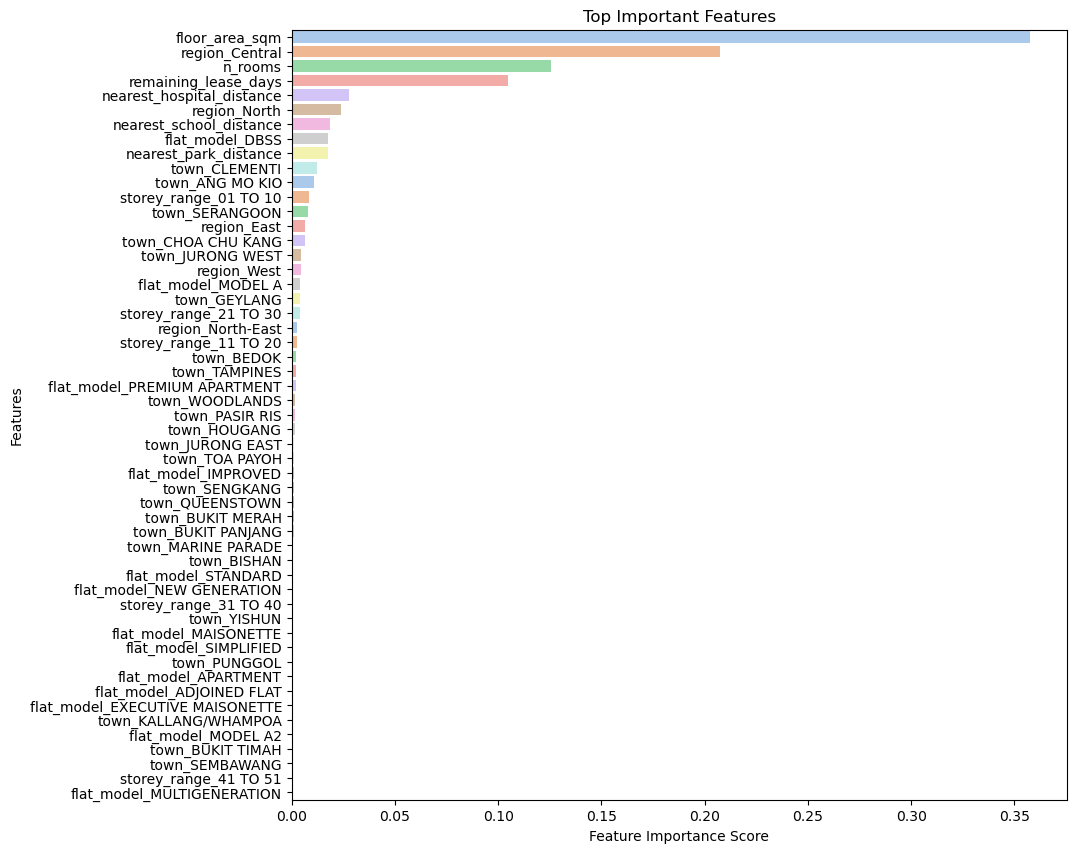

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

feature_imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

top_features = feature_imp.head(10)

custom_colors = sns.color_palette("pastel", len(top_features))

plt.figure(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index, palette=custom_colors, dodge=False)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top Important Features')
plt.show()

This model indicates that `floor_area_sqm`, `region_Central` and `remaining_lease_days` are the most important predictors. 

#### Summary of regressions

We summarize the regression part by answering our initial research question related to this section: 

- ***What is the best model used to predict the resale prices in Singapore?***

Random forest.

- ***What variables are the best predictors of the resale price?***

Since we evaluate the Random forest as the best from the created models, we may conclude that the following variables seem to be the 5 most important predictors of the price: 
* `floor_area_sqm` 
* `region_Central` 
* `remaining_lease_days` 
* `n_rooms` 
* `nearest_hospital_distance`         
                 

Random forest model indicates that `floor_area_sqm`, `region_Central` and `remaining_lease_days` seem as the most important. This is in contrast with other one's we examined, which  highlighted rather the flat type than the flat, and/or town-specific variables of the flat. Decision tree model generalizes the geographical dimension to a region, namely, the `region_Central`, but on the other hand is more specific when highlighting the number of rooms as an important predictor. Important to notice is also the significance of distances to hospitals, schools and parks, which was negleted or even insignificant in other models. 


- ***Can we see any differences and similarities between traditional housing market predictors?***

As we expected, the fact `remaining_lease_days` is this important is strictly unique to the Singapore market. In other words, our model predicts that the time left till the end of the lease will highly influence the price. This rather would not have happened in other housing markets of a less controlled nature. It shows the influence HDB still has over the market, even in cases when they allow flat reselling. 

### 3.5 Classification <a id="section_3_5"></a>
**Author:** Dragomir Balan, h12023848

#### 3.5.1 Task Description

Our assumption is that people may prefer living in specific regions of Singapore. For instance, some regions are more acclaimed, either due to their [luxuriousness](https://www.pacificprime.sg/blog/an-expats-guide-to-living-in-singapore-best-areas-to-live/), or due to their proximity to specific [institutions or leisure places](https://www.littlestepsasia.com/singapore/family-life/relocation-and-moving/neighborhoods-in-singapore/). As such, some flats can be more spatious (e.g., `floor_area_sqm`), or even costlier with greater views (e.g., `storey_range` and `resale_price`).

Therefore, we have selected the following predictor variables that we require for the execution of this exercise, which are  `storey_range`, `floor_area_sqm`, `n_rooms`, `resale_price`, `remaining_lease_days`, `nearest_school_distance`, `nearest_hospital_distance`, `nearest_park_distance`. They were selected upon analysing their relevance in coordination with our target variable, specifically the `region`.

It is important to mention that variables like `town` or `street_name` will not be used in our model due to potential multi-collinearity (i.e., we expect the `town` variable to be the strongest predictor of a flat in a specific `region`). In addition, we could not use variables like `flat_model` due to the large amount of potential dummy variables, which would complicate our interpretation of the classification models.

However, we would like to argue that this exercise can be significantly scaled to broader applications, and should serve as a indication of baseline performance and possible extension.

#### 3.5.2 Feature Pre-Processing <a id="sub_section_3_5_2"></a>

Importing the required packages for the task.

In [121]:
# For model building

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.inspection import permutation_importance

In [122]:
# Select all the predictor and target variables in a dataframe for the classification tasks
flats_gdf_clsf = flats_gdf.loc[:, ["region", "storey_range", "floor_area_sqm", "n_rooms", "resale_price", "remaining_lease_days", "nearest_school_distance", "nearest_hospital_distance", "nearest_park_distance"]]

Now, we will one-hot-encode the `storey_range` variable so we can use it in our model. As for the target variable

In [123]:
# OneHotEncode the categorical features
ct = ColumnTransformer([("encode_cats", OneHotEncoder(), ["storey_range"]),],
                       remainder="passthrough", verbose_feature_names_out=False)

# Applying the changes to the dataframe
flats_gdf_clsf = pd.DataFrame(ct.fit_transform(flats_gdf_clsf), columns=ct.get_feature_names_out())

Next, we will scale our variables due to a high number in variance between e.g., `resale_price` and `n_rooms`.

In [124]:
# Instantiate the StandardScaler
scaler = StandardScaler()

# Columns to scale due to potential max_iter issues
columns_scale = ["floor_area_sqm", "n_rooms", "resale_price", "remaining_lease_days", "nearest_school_distance", "nearest_hospital_distance", "nearest_park_distance"]

# Fit the scaler to the data and transform the data
flats_gdf_clsf[columns_scale] = scaler.fit_transform(flats_gdf_clsf[columns_scale])

At this point, we will split the dataset into 80% training and 20% test sets.

In [125]:
# Assigning the predictor and target variables
X_clsf = flats_gdf_clsf.drop("region", axis=1)
y_clsf = flats_gdf_clsf["region"]

# Splitting the dataset into training and test sets, with 80% and 20% respectively
X_train_clsf, X_test_clsf, y_train_clsf, y_test_clsf = train_test_split(X_clsf, y_clsf, test_size=0.2, random_state=1)

#### 3.5.3 Logistic Regression <a id="sub_section_3_5_3"></a>

First, we would like to initiate the `LogisticRegression` from the `scikit-learn` package. We have to specify the `multi_class` parameter, since we are dealing with a multinomial logistic regression.

In addition, let us observe which parameters are contained within it.

In [126]:
# Initiate the LogisticRegression
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Observing the parameters for the LogisticRegression
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

We would like to account for 3 type of parameters, arguably the [most important](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) as well (see [also](https://machinelearningmastery.com/multinomial-logistic-regression-with-python/)). These are the `penalty`, `C` (inverse of regularization strength), and `max_iter`.

Next, we will initiate the `GridSearchCV` which will try different number of folds to identify the best set of parameters. To make sure that we truly extract the best possible model, we will conduct a 5-fold cross-validation.

Finally, we will fit best identified model on the training set, after which we will predict the values on the test set.

In [127]:
# Assign parameters to the LogisticRegression classifier
parameters = {
    "penalty": ["l1", "l2"],
    "C": [0.1, 1.0, 10.0],
    "max_iter": (200, 400, 600)
}

# Initiate the GridSearchCV that will run through the assigned parameters. We are using a 5-fold cross-validation
grid_models = GridSearchCV(log_reg, parameters, cv=5, n_jobs=-1)

# Fitting the model on the training set
grid_models.fit(X_train_clsf, y_train_clsf)

# Observe best parameters
print("Best parameters set:", grid_models.best_estimator_)

# Predicting on the test set using the best model
y_pred_clsf = grid_models.predict(X_test_clsf)

C:\Users\I745534\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\I745534\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\I745534\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\I745534\AppData\Local\anaconda3\Lib\site-packages\skle

Best parameters set: LogisticRegression(C=0.1, max_iter=200, multi_class='multinomial')


Now, we may have a look at the classification report, and we can infer the following:

- The performance metric of our interest is the `F1-score`. As such, we can observe that the model has an `F1-score` of 0.55, proving that it is not really performant.
- Looking at the `support` column, we can see the number of observations in the test set. For instance, the `North-East` region has the highest number in our sample. Sadly, we do not have a balanced distribution, as we were limited by the extraction of ~7,000 available rows. 
- However, that is only the performance of the logistic regression, which usually requires a much larger sample size in comparison to tree-based models.

In [128]:
# Evaluating the model performance
print(classification_report(y_test_clsf, y_pred_clsf))

              precision    recall  f1-score   support

     Central       0.67      0.76      0.72       148
        East       0.49      0.32      0.39       195
       North       0.52      0.47      0.49       253
  North-East       0.50      0.65      0.56       317
        West       0.56      0.52      0.54       305

    accuracy                           0.54      1218
   macro avg       0.55      0.54      0.54      1218
weighted avg       0.54      0.54      0.53      1218



We may also observe the confusion matrix. Some interesting insights:
- The model confuses the `North-East` with the `North` and `East` classes, which could be because of the region's distribution that is rather "inside" of the `North` one, and really close to the `East` one (see Singapore region map above).
- There are very few observations for the `East` region, however most flats are successfuly predicted in this specific class.
- It appears that there are less misclassifications done by the model for the `Central` class, which could due to their distinct [prices and demand](https://jimmy-sum.com/blog/compare-rcr-ccr-for-maximum-return).

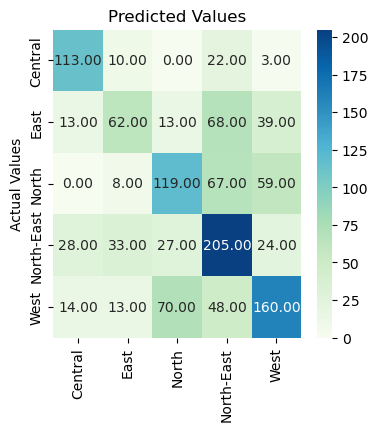

In [129]:
# Extracting the target class labels from the model
classes = grid_models.best_estimator_.classes_

# Plotting the confusion matrix
plt.figure(figsize=(4, 4))
g = sns.heatmap(confusion_matrix(y_test_clsf, y_pred_clsf), yticklabels=classes, xticklabels=classes, annot=True, fmt=".2f", cmap="GnBu")

# Set the labels
plt.title("Predicted Values")
plt.ylabel("Actual Values")

# Show the plot
plt.show()

Our findings from the summary below:

- We may observe the y-intercept(s) of the model. However, since this is a multiclass classification task, we can see 5 y-intercepts ($\beta_0$) for each specific class of the `region` variable.
- In addition, we can observe the $\beta_1$ coefficients (log-odds) of each variables in relation to the `region`. Positive coefficients increase the log-odds, while negative coefficients decrease them. 
- For example, for each one-unit increase in `floor_area_sqm`, the log-odds of a flat being in the `Central` region (compared to the reference category) decreases by 2.307415. This may mean that apartments are smaller, as shown by [this research](https://www.edgeprop.sg/property-news/analysis-evolution-condo-sizes-over-years).

In [130]:
# Extract the coefficients (beta_1) and intercepts (beta_0)
beta_1 = grid_models.best_estimator_.coef_
beta_0 = grid_models.best_estimator_.intercept_

# Creating a dataframe
coeff_df = pd.DataFrame(beta_1, columns=X_clsf.columns, index=classes)
intercept_df = pd.DataFrame(beta_0, index=classes, columns=['y-intercept'])

# Merging the dataframe
summary_df = coeff_df.join(intercept_df)
summary_df

,storey_range_01 TO 10,storey_range_11 TO 20,storey_range_21 TO 30,storey_range_31 TO 40,storey_range_41 TO 51,floor_area_sqm,n_rooms,resale_price,remaining_lease_days,nearest_school_distance,nearest_hospital_distance,nearest_park_distance,y-intercept
Central,0.17,-0.13,-0.18,0.14,0.00,-1.65,-0.69,2.67,-1.09,0.25,-0.70,-0.18,-1.73
East,0.22,0.02,-0.21,-0.03,-0.00,0.81,-0.62,0.35,-0.22,-0.14,0.16,-0.21,0.14
North,-0.12,0.11,0.02,-0.01,-0.00,1.06,0.44,-2.29,0.62,-0.16,0.17,0.13,0.19
North-East,-0.00,0.15,-0.04,-0.11,-0.00,-0.79,0.68,0.09,0.44,-0.26,-0.56,-0.33,0.71
West,-0.28,-0.14,0.41,0.00,0.00,0.57,0.18,-0.83,0.24,0.31,0.94,0.59,0.69


#### 3.5.4 Random Forest <a id="sub_section_3_5_4"></a>

In [131]:
# Initiate the RandomForestClassifier
rf = RandomForestClassifier()

# Observing the parameters for the RandomForestClassifier
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [132]:
# Assign parameters to the RandomForestClassifier classifier
parameters = {
    "max_depth": [50, 100],
    "min_samples_leaf": [0.01, 0.1],
    "n_estimators": [50, 200],
    "max_features": [0.5, 0.8]
}

# Initiate the GridSearchCV that will run through the assigned parameters. We are using a 5-fold cross-validation
grid_models = GridSearchCV(rf, parameters, cv=5, n_jobs=-1)

# Fitting the model on the training set
grid_models.fit(X_train_clsf, y_train_clsf)

# Observe best parameters
print("Best parameters set:", grid_models.best_estimator_)

# Predicting on the test set using the best model
y_pred_clsf = grid_models.predict(X_test_clsf)

Best parameters set: RandomForestClassifier(max_depth=100, max_features=0.5, min_samples_leaf=0.01,
                       n_estimators=50)


In the confusion matrix below, we may observe a much better classification performed by the random forest model. For instance, while for some classes such as `Central` and `North-East` the model misclassified, for the underrepresented category `East`, `North` and `West` the model showed a greater increase in performance.

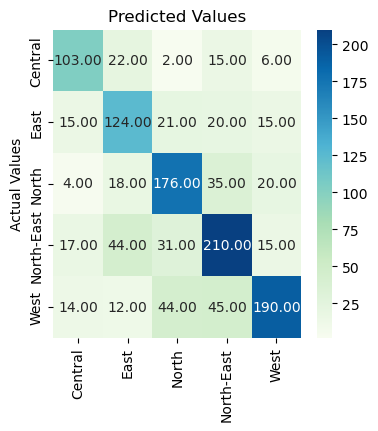

In [133]:
# Extracting the target class labels from the model
classes = grid_models.best_estimator_.classes_

# Plotting the confusion matrix
plt.figure(figsize=(4, 4))
g = sns.heatmap(confusion_matrix(y_test_clsf, y_pred_clsf), yticklabels=classes, xticklabels=classes, annot=True, fmt=".2f", cmap="GnBu")

# Set the labels
plt.title("Predicted Values")
plt.ylabel("Actual Values")

# Show the plot
plt.show()

Accordingly, the classification report demonstrates an `F1-score` of 0.66, an increase from logistic regression's 0.55 score.

In [134]:
# Evaluating the model performance
print(classification_report(y_test_clsf, y_pred_clsf))

              precision    recall  f1-score   support

     Central       0.67      0.70      0.68       148
        East       0.56      0.64      0.60       195
       North       0.64      0.70      0.67       253
  North-East       0.65      0.66      0.65       317
        West       0.77      0.62      0.69       305

    accuracy                           0.66      1218
   macro avg       0.66      0.66      0.66      1218
weighted avg       0.67      0.66      0.66      1218



We can also observe the importances of all the features in the model. As such, we may deduce the following:
- The `remaining_lease_days` variable is one of strongest predictor, and its removal from the model would significantly bring down its performance. The reason behind its importance may be due to a high degree of flats renewal, where the western and eastern sides usually have less newer projects (thus lower `remaining_lease_days`), whereas the central and northern sides have [planned new constructions and renewals](https://www.ura.gov.sg/Corporate/Planning/Long-Term-Plan-Review/Space-for-Our-Dreams-Exhibition/Live/More-Homes).
- The `nearest_hospital_distance` is also a strong predictor, but that may be because, as we may observe above in our graph "Amenities in Singapore", there are very few hospitals in Singapore (around [~19 only](https://www.moh.gov.sg/resources-statistics/singapore-health-facts/health-facilities)). They are rather concentrated around the specific regions, which might have given away the `region` for the model.
- The `resale_price` is equally an important variable, as some specific regions have flats that are more expensive than in other regions.

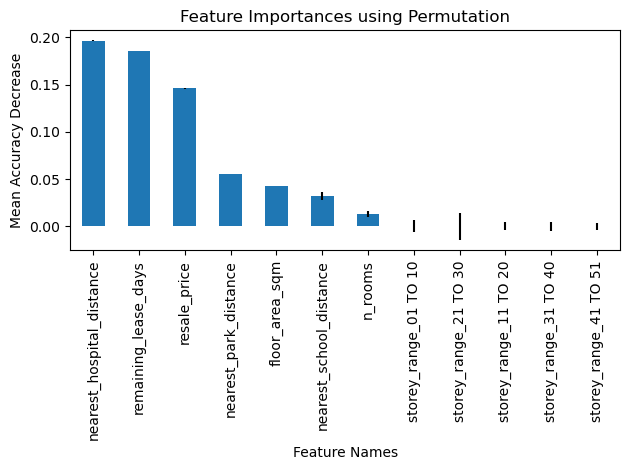

In [135]:
# Extracting the feature names
feature_names = X_clsf.columns.tolist()

# Acquiring the feature importances
result = permutation_importance(
    grid_models.best_estimator_, X_test_clsf, y_test_clsf, n_repeats=10, random_state=1, n_jobs=2)

# Creating a series
forest_importances = pd.Series(result.importances_mean, index=feature_names)

# Plotting the importances
fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False).plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature Importances using Permutation")
ax.set_ylabel("Mean Accuracy Decrease")
ax.set_xlabel("Feature Names")
fig.tight_layout()
plt.show()

#### 3.5.5 K-nearest neighbour <a id="sub_section_3_5_5"></a>

In [136]:
# Initiate the KNeighborsClassifier
knn_clsf = KNeighborsClassifier()

# Observing the parameters for the KNeighborsClassifier
knn_clsf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [137]:
# Assign parameters to the KNeighborsClassifier classifier
parameters = {
    "n_neighbors": [5, 10, 15],
    "algorithm": ["kd_tree", "ball_tree"],
    "leaf_size": [25, 50],
}

# Initiate the GridSearchCV that will run through the assigned parameters. We are using a 5-fold cross-validation
grid_models = GridSearchCV(knn_clsf, parameters, cv=5, n_jobs=-1)

# Fitting the model on the training set
grid_models.fit(X_train_clsf, y_train_clsf)

# Observe best parameters
print("Best parameters set:", grid_models.best_estimator_)

# Predicting on the test set using the best model
y_pred_clsf = grid_models.predict(X_test_clsf)

Best parameters set: KNeighborsClassifier(algorithm='kd_tree', leaf_size=25)


In [138]:
# Evaluating the model performance
print(classification_report(y_test_clsf, y_pred_clsf))

              precision    recall  f1-score   support

     Central       0.73      0.77      0.75       148
        East       0.67      0.73      0.70       195
       North       0.69      0.74      0.71       253
  North-East       0.69      0.72      0.70       317
        West       0.85      0.70      0.77       305

    accuracy                           0.72      1218
   macro avg       0.73      0.73      0.73      1218
weighted avg       0.73      0.72      0.73      1218



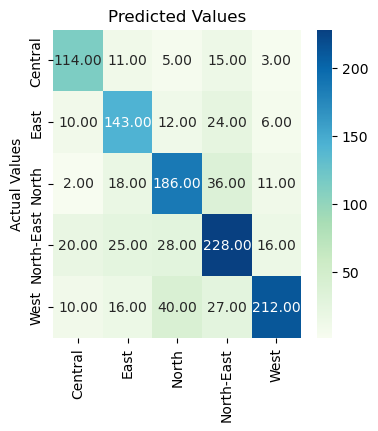

In [139]:
# Extracting the target class labels from the model
classes = grid_models.best_estimator_.classes_

# Plotting the confusion matrix
plt.figure(figsize=(4, 4))
g = sns.heatmap(confusion_matrix(y_test_clsf, y_pred_clsf), yticklabels=classes, xticklabels=classes, annot=True, fmt=".2f", cmap="GnBu")

# Set the labels
plt.title("Predicted Values")
plt.ylabel("Actual Values")

# Show the plot
plt.show()

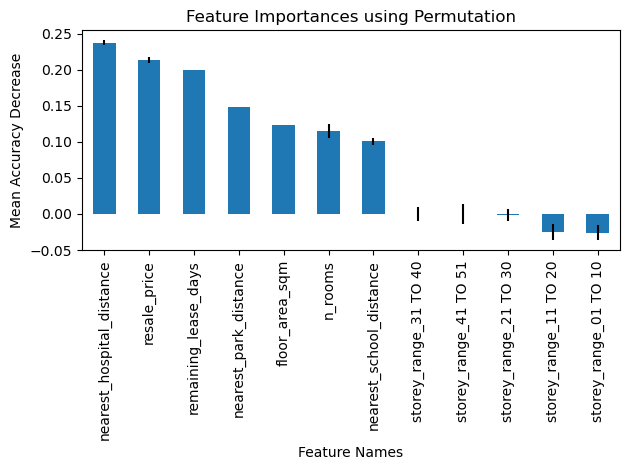

In [140]:
# Acquiring the feature importances
result = permutation_importance(
    grid_models.best_estimator_, X_test_clsf, y_test_clsf, n_repeats=10, random_state=1, n_jobs=2)

# Creating a series
forest_importances = pd.Series(result.importances_mean, index=feature_names)

# Plotting the importances
fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False).plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature Importances using Permutation")
ax.set_ylabel("Mean Accuracy Decrease")
ax.set_xlabel("Feature Names")
fig.tight_layout()
plt.show()

### 3.5.6 Conclusion <a id="sub_section_3_5_6"></a>

We may observe that the K-nearest Neighbor outperforms both the Logistic Regression and the Random Forest models. It has misclassified less flats per region, and has an `F1-score` of 0.73. Judging by the feature importance, the top 3 features are the same as identified by the Random Forest model, however now `nearest_hospital_distance` is more relevant for predicting the `region` where a flat is located in Singapore. 

Unfortunately, while a useful metric, we were not able to calculate the AUROC score since the whole exercise involved multi-class classification, which would've been possible to highlight in terms of two individual classes (e.g., `Central` vs. `North`), however not in a one-vs-rest setting. Nevertheless, we believe that we extracted the necessary insight which would allow us to identify the better performing model.

#### What can we derive from this classification exercise?

Flats in Singapore are highly dependant on the region where they are located. Some regions are in higher demanded, whereas some are less. Given our data, models like K-nearest Neighbor and Random Forest have shown an increasing performance from the Multinomial Logistic Regression. Using them, we have identified the most important variables, where in some instances it was `remaining_lease_days` or `nearest_hospital_distance`, and `resale_price`.

#### Did we answer the research questions?

Do the flats in Singapore's regions differ between one another?
- Yes, we have seen that there is a significant difference between the regions of Singapore, with both flat-specific and location-specific variables having variying impact on the likelihood of a flat being from one given region.

Which regions are more acclaimed and of higher interest to potential buyers?
- We may deduce that the `Central` part of Singapore, while it has smaller flats (in sqm), the prices are much higher and in bigger demand as opposed to the more affordable `North` part of the island. The next best choices for residents looking for flats are the `North-East`, and `West`.